# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [2]:
#Imports:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
pwd

'/Users/jasonchia/Desktop/DSIPROJECT1/project_1/code'

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [4]:
#Code:
sat_2017_df = pd.read_csv('/Users/jasonchia/Desktop/GA DSI Project_1/project_1/data/sat_2017.csv')
act_2017_df = pd.read_csv('/Users/jasonchia/Desktop/GA DSI Project_1/project_1/data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [5]:
#Code:
sat_2017_df.head(10)

State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  
8   468    950  
9   497   1017

In [6]:
act_2017_df.head(10)

State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2

In [91]:
act_2017_df.tail()

State  Participation  English  Math  Reading  Science Composite
47       Virginia             29     23.5  23.3     24.6     23.5      23.8
48     Washington             29     20.9  21.9     22.1     22.0      21.9
49  West Virginia             69     20.0  19.4     21.2     20.5      20.4
50      Wisconsin            100     19.7  20.4     20.6     20.9      20.5
51        Wyoming            100     19.4  19.8     20.8     20.6     20.2x

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: There are 5 variables in sat_2017_df while there are 7 variables in act_2017_df. There are 2 sub-tests for act_2017-evidence-based reading and writing, and math-and 4 for sat_2017-english, math, reading, science. The composite column in act_2017 takes the average of all 4 sub-tests while the total column in sat_2017 sums up the scores of the 2 sub-tests. Participation in both datasets has '%'. act_2017 has an additional row on National which is absent in sat_2017.

#### 4a. Does the data look complete? 

Answer: No. Features such as race/ethnicity, gender, first language learned, highest level of parental education, intended college major, degree-level goal, highest GPA, and possibly even presence or absence/degree of government's financial aid in the form of fee waivers, which are present in state-level reports are absent. Further SAT score breakdown that may be of interest such as test scores (reading, writing and language, math), cross test and sub scores are also absent for the sat_2017 dataset provided. Further ACT score breakdown such as the raw scoring component for each of the 4 sub-tests (english, math, reading, science) are also absent.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 

Yes, for Wyoming, the Composite score was recorded as '20.2x'.

Minimum possible value for SAT Total Score, Section Score, Test Score, optional SAT Essay Score, Cross-Test Score, Sub Score are 400, 200, 10, 2, 10, 1 respectively. Maximum for the respective SAT components are 1600, 800, 40, 8, 40, 15 respectively.

Minimum possible value for each of ACT's sub-tests-English, Math, Reading, Science-is 1 while the maximum is 36 but this is based on a scaled scoring system. The composite score is obtained by averaging the scaled scores of all 4 sub-tests. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [6]:
#code
act_2017_df.iloc[-1,-1] = '20.2'

In [7]:
act_2017_df.tail()

State Participation  English  Math  Reading  Science Composite
47       Virginia           29%     23.5  23.3     24.6     23.5      23.8
48     Washington           29%     20.9  21.9     22.1     22.0      21.9
49  West Virginia           69%     20.0  19.4     21.2     20.5      20.4
50      Wisconsin          100%     19.7  20.4     20.6     20.9      20.5
51        Wyoming          100%     19.4  19.8     20.8     20.6      20.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
sat_2017_df.describe()

Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           569.117647  547.627451  1126.098039
std                             45.666901   84.909119    92.494812
min                            482.000000   52.000000   950.000000
25%                            533.500000  522.000000  1055.500000
50%                            559.000000  548.000000  1107.000000
75%                            613.000000  599.000000  1212.000000
max                            644.000000  651.000000  1295.000000

In [9]:
act_2017_df.describe()

English       Math    Reading    Science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.040385
std     2.332132   1.963602   2.048672   3.151113
min    16.300000  18.000000  18.100000   2.300000
25%    19.000000  19.400000  20.475000  19.900000
50%    20.550000  20.900000  21.700000  21.150000
75%    23.300000  23.100000  24.125000  22.525000
max    25.500000  25.300000  26.000000  24.900000

In [10]:
#code

print(sat_2017_df.info())
print(act_2017_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB
None


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Yes. For sat_2017_df, 'Participation' should either be floats or integers but they are coded as objects and it has a '%' included. For act_2017_df, 'Participation' should either be floats or integers and 'Composite' should be floats, but they are coded as objects and 'Participation' has a '%' included.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [11]:
def to_int(value):   #Strips each value in the column of '%' and converts it into an integer.
    value = int(value.replace('%',''))
    return value

sat_2017_df['Participation'] = sat_2017_df['Participation'].apply(to_int)
act_2017_df['Participation'] = act_2017_df['Participation'].apply(to_int)

In [12]:
act_2017_df.tail()

State  Participation  English  Math  Reading  Science Composite
47       Virginia             29     23.5  23.3     24.6     23.5      23.8
48     Washington             29     20.9  21.9     22.1     22.0      21.9
49  West Virginia             69     20.0  19.4     21.2     20.5      20.4
50      Wisconsin            100     19.7  20.4     20.6     20.9      20.5
51        Wyoming            100     19.4  19.8     20.8     20.6      20.2

In [52]:
act_2017_df.Composite

0      21.0
1      19.2
2      19.8
3      19.7
4      19.4
5      22.8
6      20.8
7      25.2
8      24.1
9      24.2
10     19.8
11     21.4
12     19.0
13     22.3
14     21.4
15     22.6
16     21.9
17     21.7
18     20.0
19     19.5
20     24.3
21     23.6
22     25.4
23     24.1
24     21.5
25     18.6
26     20.4
27     20.3
28     21.4
29     17.8
30     25.5
31     23.9
32     19.7
33     24.2
34     19.1
35     20.3
36     22.0
37     19.4
38     21.8
39     23.7
40     24.0
41     18.7
42     21.8
43     19.8
44     20.7
45     20.3
46     23.6
47     23.8
48     21.9
49     20.4
50     20.5
51    20.2x
Name: Composite, dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [13]:
#code
def to_flt(value):   #Converts each value into a float.
    value = float(value)
    return value

act_2017_df['Composite'] = act_2017_df['Composite'].apply(to_flt)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [14]:
#code
type_lst = [str(type(value)) for value in act_2017_df['Composite']]
np.unique(type_lst)


array(["<class 'float'>"], dtype='<U15')

- Display the data types again to confirm they are correct.

In [15]:
#Code:
print(sat_2017_df.info())
print(act_2017_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null int64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null int64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB
None


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [141]:
sat_2017_df.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [142]:
act_2017_df.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [16]:
#code
sat_2017_df.rename(columns={'State':'state','Participation':'sat_2017_participation','Evidence-Based Reading and Writing':'sat_2017_erw','Math':'sat_2017_math','Total':'sat_2017_total'},inplace=True)

In [17]:
act_2017_df.rename(columns={'State':'state','Participation':'act_2017_participation','English':'act_2017_english','Math':'act_2017_math','Reading':'act_2017_reading','Science':'act_2017_science','Composite':'act_2017_composite'},inplace=True)

In [10]:
act_2017_df

state  act_2017_participation  act_2017_english  \
0               National                      60              20.3   
1                Alabama                     100              18.9   
2                 Alaska                      65              18.7   
3                Arizona                      62              18.6   
4               Arkansas                     100              18.9   
5             California                      31              22.5   
6               Colorado                     100              20.1   
7            Connecticut                      31              25.5   
8               Delaware                      18              24.1   
9   District of Columbia                      32              24.4   
10               Florida                      73              19.0   
11               Georgia                      55              21.0   
12                Hawaii                      90              17.8   
13                 Idaho                      38              21.9   
14              Illinois                      93              21.0   
15               Indiana                      35              22.0   
16                  Iowa                      67              21.2   
17                Kansas                      73              21.1   
18              Kentucky                     100              19.6   
19             Louisiana                     100              19.4   
20                 Maine                       8              24.2   
21              Maryland                      28              23.3   
22         Massachusetts                      29              25.4   
23              Michigan                      29              24.1   
24             Minnesota                     100              20.4   
25           Mississippi                     100              18.2   
26              Missouri                     100              19.8   
27               Montana                     100              19.0   
28              Nebraska                      84              20.9   
29                Nevada                     100              16.3   
30         New Hampshire                      18              25.4   
31            New Jersey                      34              23.8   
32            New Mexico                      66              18.6   
33              New York                      31              23.8   
34        North Carolina                     100              17.8   
35          North Dakota                      98              19.0   
36                  Ohio                      75              21.2   
37              Oklahoma                     100              18.5   
38                Oregon                      40              21.2   
39          Pennsylvania                      23              23.4   
40          Rhode Island                      21              24.0   
41        South Carolina                     100              17.5   
42          South Dakota                      80              20.7   
43             Tennessee                     100              19.5   
44                 Texas                      45              19.5   
45                  Utah                     100              19.5   
46               Vermont                      29              23.3   
47              Virginia                      29              23.5   
48            Washington                      29              20.9   
49         West Virginia                      69              20.0   
50             Wisconsin                     100              19.7   
51               Wyoming                     100              19.4   

    act_2017_math  act_2017_reading  act_2017_science  act_2017_composite  
0            20.7              21.4              21.0                21.0  
1            18.4              19.7              19.4                19.2  
2            19.8              20.4              19.9                19.8  
3   

In [172]:
sat_2017_df

state  sat_2017_participation  sat_2017_erw  sat_2017_math  \
0                Alabama                       5           593            572   
1                 Alaska                      38           547            533   
2                Arizona                      30           563            553   
3               Arkansas                       3           614            594   
4             California                      53           531            524   
5               Colorado                      11           606            595   
6            Connecticut                     100           530            512   
7               Delaware                     100           503            492   
8   District of Columbia                     100           482            468   
9                Florida                      83           520            497   
10               Georgia                      61           535            515   
11                Hawaii                      55           544            541   
12                 Idaho                      93           513            493   
13              Illinois                       9           559            556   
14               Indiana                      63           542            532   
15                  Iowa                       2           641            635   
16                Kansas                       4           632            628   
17              Kentucky                       4           631            616   
18             Louisiana                       4           611            586   
19                 Maine                      95           513            499   
20              Maryland                      69           536             52   
21         Massachusetts                      76           555            551   
22              Michigan                     100           509            495   
23             Minnesota                       3           644            651   
24           Mississippi                       2           634            607   
25              Missouri                       3           640            631   
26               Montana                      10           605            591   
27              Nebraska                       3           629            625   
28                Nevada                      26           563            553   
29         New Hampshire                      96           532            520   
30            New Jersey                      70           530            526   
31            New Mexico                      11           577            561   
32              New York                      67           528            523   
33        North Carolina                      49           546            535   
34          North Dakota                       2           635            621   
35                  Ohio                      12           578            570   
36              Oklahoma                       7           530            517   
37                Oregon                      43           560            548   
38          Pennsylvania                      65           540            531   
39          Rhode Island                      71           539            524   
40        South Carolina                      50           543            521   
41          South Dakota                       3           612            603   
42             Tennessee                       5           623            604   
43                 Texas                      62           513            507   
44                  Utah                       3           624            614   
45               Vermont                      60           562            551   
46              Virginia                      65           561            541   
47            Washington                      64           541            534   
48         West Virginia                      14  

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|ACT 2017, ACT 2018, SAT 2017, SAT 2018|Name of each US state (51 altogether as District of Columbia was included in addition to Washington)| 
|**act_2017_participation**|*int*|ACT 2017|ACT 2017 Participation Rate in each US state|
|**act_2017_english**|*float*|ACT 2017|Mean scaled score (min 1, max 36) for the English test component in ACT 2017 by each US state|
|**act_2017_math**|*float*|ACT 2017|Mean scaled score (min 1, max 36) for the Math test component in ACT 2017 by each US state|
|**act_2017_reading**|*float*|ACT 2017|Mean scaled score (min 1, max 36) for the Reading test component in ACT 2017 by each US state|
|**act_2017_science**|*float*|ACT 2017|Mean scaled score (min 1, max 36) for the Science test component in ACT 2017 by each US state|
|**act_2017_composite**|*float*|ACT 2017|Average of mean scaled scores (min 1, max 36) from English, Math, Reading and Science test components in ACT 2017 by each US state|
|**sat_2017_participation**|*int*|SAT 2017|SAT 2017 Participation Rate in each US state|
|**sat_2017_erw**|*int*|SAT 2017|Mean score (min 200, max 800) for the Evidence-Based Reading and Writing Section component of SAT 2017 by each US state|
|**sat_2017_math**|*int*|SAT 2017|Mean score (min 200, max 800) for the Math Section component of SAT 2017 by each US state|
|**sat_2017_total**|*int*|SAT 2017|Sum of mean scores (min 400, max 1600) from both Evidence-Based Reading and Writing and Math Section components of SAT 2017 by each US state|
|**act_2018_participation**|*int*|ACT 2018|ACT 2018 Participation Rate in each US state|
|**act_2018_english**|*float*|ACT 2018|Mean scaled score (min 1, max 36) for the English test component in ACT 2018|
|**act_2018_math**|*float*|ACT 2018|Mean scaled score (min 1, max 36) for the Math test component in ACT 2018|
|**act_2018_reading**|*float*|ACT 2018|Mean scaled score (min 1, max 36) for the Reading test component in ACT 2018|
|**act_2018_science**|*float*|ACT 2018|Mean scaled score (min 1, max 36) for the Science test component in ACT 2018|
|**act_2018_composite**|*float*|ACT 2018|Average of mean scaled scores (min 1, max 36) from English, Math, Reading and Science test components in ACT 2018|
|**sat_2018_participation**|*int*|SAT 2018|SAT 2018 Participation Rate in each US state|
|**sat_2018_erw**|*int*|SAT 2018|Mean score (min 200, max 800) for the Evidence-Based Reading and Writing Section component of SAT 2018 by each US state|
|**sat_2018_math**|*int*|SAT 2018|Mean score (min 200, max 800) for the Math Section component of SAT 2018 by each US state|
|**sat_2018_total**|*int*|SAT 2018|Sum of mean scores (min 400, max 1600) from both Evidence-Based Reading and Writing and Math Section components of SAT 2018 by each US state|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [18]:
#code
#print(act_2017_df_renamed.head())
act_2017_df = act_2017_df.drop([0])

In [176]:
act_2017_df

state  act_2017_participation  act_2017_english  \
1                Alabama                     100              18.9   
2                 Alaska                      65              18.7   
3                Arizona                      62              18.6   
4               Arkansas                     100              18.9   
5             California                      31              22.5   
6               Colorado                     100              20.1   
7            Connecticut                      31              25.5   
8               Delaware                      18              24.1   
9   District of Columbia                      32              24.4   
10               Florida                      73              19.0   
11               Georgia                      55              21.0   
12                Hawaii                      90              17.8   
13                 Idaho                      38              21.9   
14              Illinois                      93              21.0   
15               Indiana                      35              22.0   
16                  Iowa                      67              21.2   
17                Kansas                      73              21.1   
18              Kentucky                     100              19.6   
19             Louisiana                     100              19.4   
20                 Maine                       8              24.2   
21              Maryland                      28              23.3   
22         Massachusetts                      29              25.4   
23              Michigan                      29              24.1   
24             Minnesota                     100              20.4   
25           Mississippi                     100              18.2   
26              Missouri                     100              19.8   
27               Montana                     100              19.0   
28              Nebraska                      84              20.9   
29                Nevada                     100              16.3   
30         New Hampshire                      18              25.4   
31            New Jersey                      34              23.8   
32            New Mexico                      66              18.6   
33              New York                      31              23.8   
34        North Carolina                     100              17.8   
35          North Dakota                      98              19.0   
36                  Ohio                      75              21.2   
37              Oklahoma                     100              18.5   
38                Oregon                      40              21.2   
39          Pennsylvania                      23              23.4   
40          Rhode Island                      21              24.0   
41        South Carolina                     100              17.5   
42          South Dakota                      80              20.7   
43             Tennessee                     100              19.5   
44                 Texas                      45              19.5   
45                  Utah                     100              19.5   
46               Vermont                      29              23.3   
47              Virginia                      29              23.5   
48            Washington                      29              20.9   
49         West Virginia                      69              20.0   
50             Wisconsin                     100              19.7   
51               Wyoming                     100              19.4   

    act_2017_math  act_2017_reading  act_2017_science  act_2017_composite  
1            18.4              19.7              19.4                19.2  
2            19.8              20.4              19.9                19.8  
3            19.8              20.1              19.8                19.7  
4            19.0              19.7              19.5                19.4 

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [157]:
sat_2017_df

state  sat_2017_participation  sat_2017_erw  sat_2017_math  \
0                Alabama                       5           593            572   
1                 Alaska                      38           547            533   
2                Arizona                      30           563            553   
3               Arkansas                       3           614            594   
4             California                      53           531            524   
5               Colorado                      11           606            595   
6            Connecticut                     100           530            512   
7               Delaware                     100           503            492   
8   District of Columbia                     100           482            468   
9                Florida                      83           520            497   
10               Georgia                      61           535            515   
11                Hawaii                      55           544            541   
12                 Idaho                      93           513            493   
13              Illinois                       9           559            556   
14               Indiana                      63           542            532   
15                  Iowa                       2           641            635   
16                Kansas                       4           632            628   
17              Kentucky                       4           631            616   
18             Louisiana                       4           611            586   
19                 Maine                      95           513            499   
20              Maryland                      69           536             52   
21         Massachusetts                      76           555            551   
22              Michigan                     100           509            495   
23             Minnesota                       3           644            651   
24           Mississippi                       2           634            607   
25              Missouri                       3           640            631   
26               Montana                      10           605            591   
27              Nebraska                       3           629            625   
28                Nevada                      26           563            553   
29         New Hampshire                      96           532            520   
30            New Jersey                      70           530            526   
31            New Mexico                      11           577            561   
32              New York                      67           528            523   
33        North Carolina                      49           546            535   
34          North Dakota                       2           635            621   
35                  Ohio                      12           578            570   
36              Oklahoma                       7           530            517   
37                Oregon                      43           560            548   
38          Pennsylvania                      65           540            531   
39          Rhode Island                      71           539            524   
40        South Carolina                      50           543            521   
41          South Dakota                       3           612            603   
42             Tennessee                       5           623            604   
43                 Texas                      62           513            507   
44                  Utah                       3           624            614   
45               Vermont                      60           562            551   
46              Virginia                      65           561            541   
47            Washington                      64           541            534   
48         West Virginia                      14  

In [158]:
act_2017_df

state  act_2017_participation  act_2017_english  act_2017_math  \
1     Alabama                     100              18.9           18.4   
2      Alaska                      65              18.7           19.8   
3     Arizona                      62              18.6           19.8   
4    Arkansas                     100              18.9           19.0   
5  California                      31              22.5           22.7   

   act_2017_reading  act_2017_science  act_2017_composite  
1              19.7              19.4                19.2  
2              20.4              19.9                19.8  
3              20.1              19.8                19.7  
4              19.7              19.5                19.4  
5              23.1              22.2                22.8

In [19]:
#Code:
sat_act_2017_df = pd.merge(act_2017_df,sat_2017_df)
sat_act_2017_df

state  act_2017_participation  act_2017_english  \
0                Alabama                     100              18.9   
1                 Alaska                      65              18.7   
2                Arizona                      62              18.6   
3               Arkansas                     100              18.9   
4             California                      31              22.5   
5               Colorado                     100              20.1   
6            Connecticut                      31              25.5   
7               Delaware                      18              24.1   
8   District of Columbia                      32              24.4   
9                Florida                      73              19.0   
10               Georgia                      55              21.0   
11                Hawaii                      90              17.8   
12                 Idaho                      38              21.9   
13              Illinois                      93              21.0   
14               Indiana                      35              22.0   
15                  Iowa                      67              21.2   
16                Kansas                      73              21.1   
17              Kentucky                     100              19.6   
18             Louisiana                     100              19.4   
19                 Maine                       8              24.2   
20              Maryland                      28              23.3   
21         Massachusetts                      29              25.4   
22              Michigan                      29              24.1   
23             Minnesota                     100              20.4   
24           Mississippi                     100              18.2   
25              Missouri                     100              19.8   
26               Montana                     100              19.0   
27              Nebraska                      84              20.9   
28                Nevada                     100              16.3   
29         New Hampshire                      18              25.4   
30            New Jersey                      34              23.8   
31            New Mexico                      66              18.6   
32              New York                      31              23.8   
33        North Carolina                     100              17.8   
34          North Dakota                      98              19.0   
35                  Ohio                      75              21.2   
36              Oklahoma                     100              18.5   
37                Oregon                      40              21.2   
38          Pennsylvania                      23              23.4   
39          Rhode Island                      21              24.0   
40        South Carolina                     100              17.5   
41          South Dakota                      80              20.7   
42             Tennessee                     100              19.5   
43                 Texas                      45              19.5   
44                  Utah                     100              19.5   
45               Vermont                      29              23.3   
46              Virginia                      29              23.5   
47            Washington                      29              20.9   
48         West Virginia                      69              20.0   
49             Wisconsin                     100              19.7   
50               Wyoming                     100              19.4   

    act_2017_math  act_2017_reading  act_2017_science  act_2017_composite  \
0            18.4              19.7              19.4                19.2   
1            19.8              20.4              19.9                19.8   
2            19.8              20.1              19.8                19.7   
3            19.0              19.7              19.5                1

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [20]:
pwd

'/Users/jasonchia/Desktop/DSIPROJECT1/project_1/code'

In [21]:
#code
sat_act_2017_df.to_csv('../data/combined_2017.csv',index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [22]:
sat_2018_df = pd.read_csv('../data/sat_2018.csv')
act_2018_df = pd.read_csv('../data/act_2018_updated.csv')

In [23]:
sat_2018_df.head(10)

State Participation  Evidence-Based Reading and Writing  \
0               Alabama            6%                                 595   
1                Alaska           43%                                 562   
2               Arizona           29%                                 577   
3              Arkansas            5%                                 592   
4            California           60%                                 540   
5              Colorado          100%                                 519   
6           Connecticut          100%                                 535   
7              Delaware          100%                                 505   
8  District of Columbia           92%                                 497   
9               Florida           56%                                 550   

   Math  Total  
0   571   1166  
1   544   1106  
2   572   1149  
3   576   1169  
4   536   1076  
5   506   1025  
6   519   1053  
7   492    998  
8   480    977  
9   549   1099

In [189]:
act_2018_df.head(10)

State  Percentage of Students Tested  \
0               Alabama                            100   
1                Alaska                             33   
2               Arizona                             66   
3              Arkansas                            100   
4            California                             27   
5              Colorado                             30   
6           Connecticut                             26   
7              Delaware                             17   
8  District of Columbia                             32   
9               Florida                             66   

   Average Composite Score  Average English Score  Average Math Score  \
0                     19.1                   18.9                18.3   
1                     20.8                   19.8                20.6   
2                     19.2                   18.2                19.4   
3                     19.4                   19.1                18.9   
4                     22.7                   22.5                22.5   
5                     23.9                   23.9                23.2   
6                     25.6                   26.0                24.8   
7                     23.2                   23.7                23.1   
8                     23.6                   23.7                22.7   
9                     19.9                   19.2                19.3   

   Average Reading Score  Average Science Score  
0                   19.6                   19.0  
1                   21.6                   20.7  
2                   19.5                   19.2  
3                   19.7                   19.4  
4                   23.0                   22.1  
5                   24.4                   23.5  
6                   26.1                   24.9  
7                   24.5                   23.4  
8                   24.4                   23.0  
9                   21.1                   19.5

In [24]:
sat_2018_df.describe()

Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           563.686275  556.235294  1120.019608
std                             47.502627   47.772623    94.155083
min                            480.000000  480.000000   977.000000
25%                            534.500000  522.500000  1057.500000
50%                            552.000000  544.000000  1098.000000
75%                            610.500000  593.500000  1204.000000
max                            643.000000  655.000000  1298.000000

In [25]:
act_2018_df.describe()

Percentage of Students Tested  Average Composite Score  \
count                      51.000000                51.000000   
mean                       61.647059                21.486275   
std                        34.080976                 2.106278   
min                         7.000000                17.700000   
25%                        28.500000                19.950000   
50%                        66.000000                21.300000   
75%                       100.000000                23.550000   
max                       100.000000                25.600000   

       Average English Score  Average Math Score  Average Reading Score  \
count              51.000000           51.000000              51.000000   
mean               20.988235           21.125490              22.015686   
std                 2.446356            2.035765               2.167245   
min                16.600000           17.800000              18.000000   
25%                19.100000           19.400000              20.450000   
50%                20.200000           20.700000              21.600000   
75%                23.700000           23.150000              24.100000   
max                26.000000           25.200000              26.100000   

       Average Science Score  
count              51.000000  
mean               21.345098  
std                 1.870114  
min                17.900000  
25%                19.850000  
50%                21.100000  
75%                23.050000  
max                24.900000

In [26]:
sat_2018_df.info() #to check data types for sat_2018_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [27]:
act_2018_df.info() #to check data types for act_2018_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [28]:
sat_2018_df['Participation'] = sat_2018_df['Participation'].apply(to_int) #to strip '%' for each value in 'Participation' column and convert data type of 'Participation' column from object to int.

In [203]:
sat_2017_df.head(3)

state  sat_2017_participation  sat_2017_erw  sat_2017_math  \
0  Alabama                       5           593            572   
1   Alaska                      38           547            533   
2  Arizona                      30           563            553   

   sat_2017_total  
0            1165  
1            1080  
2            1116

In [204]:
sat_2018_df.head(3)

State  Participation  Evidence-Based Reading and Writing  Math  Total
0  Alabama              6                                 595   571   1166
1   Alaska             43                                 562   544   1106
2  Arizona             29                                 577   572   1149

In [29]:
sat_2018_df.rename(columns={'State':'state','Participation':'sat_2018_participation','Evidence-Based Reading and Writing':'sat_2018_erw','Math':'sat_2018_math','Total':'sat_2018_total'},inplace=True) #renaming sat_2018_df column names to align with sat_2017 data

In [206]:
act_2017_df.head(3)

state  act_2017_participation  act_2017_english  act_2017_math  \
1  Alabama                     100              18.9           18.4   
2   Alaska                      65              18.7           19.8   
3  Arizona                      62              18.6           19.8   

   act_2017_reading  act_2017_science  act_2017_composite  
1              19.7              19.4                19.2  
2              20.4              19.9                19.8  
3              20.1              19.8                19.7

In [207]:
act_2018_df.head(3)

State  Percentage of Students Tested  Average Composite Score  \
0  Alabama                            100                     19.1   
1   Alaska                             33                     20.8   
2  Arizona                             66                     19.2   

   Average English Score  Average Math Score  Average Reading Score  \
0                   18.9                18.3                   19.6   
1                   19.8                20.6                   21.6   
2                   18.2                19.4                   19.5   

   Average Science Score  
0                   19.0  
1                   20.7  
2                   19.2

In [30]:
act_2018_df.rename(columns={'State':'state','Percentage of Students Tested':'act_2018_participation','Average English Score':'act_2018_english','Average Math Score':'act_2018_math','Average Reading Score':'act_2018_reading','Average Science Score':'act_2018_science','Average Composite Score':'act_2018_composite'},inplace=True) #renaming act_2018_df column names to align with act_2017 data

In [209]:
sat_2018_df.head(3)

state  sat_2018_participation  sat_2018_erw  sat_2018_math  \
0  Alabama                       6           595            571   
1   Alaska                      43           562            544   
2  Arizona                      29           577            572   

   sat_2018_total  
0            1166  
1            1106  
2            1149

In [216]:
act_2018_df.head(3)

state  act_2018_participation  act_2018_composite  act_2018_english  \
0  Alabama                     100                19.1              18.9   
1   Alaska                      33                20.8              19.8   
2  Arizona                      66                19.2              18.2   

   act_2018_math  act_2018_reading  act_2018_science  
0           18.3              19.6              19.0  
1           20.6              21.6              20.7  
2           19.4              19.5              19.2

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [31]:
sat_act_2018_df = pd.merge(act_2018_df,sat_2018_df) #merging act_2018_df and sat_2018_df
sat_act_2018_df

state  act_2018_participation  act_2018_composite  \
0                Alabama                     100                19.1   
1                 Alaska                      33                20.8   
2                Arizona                      66                19.2   
3               Arkansas                     100                19.4   
4             California                      27                22.7   
5               Colorado                      30                23.9   
6            Connecticut                      26                25.6   
7               Delaware                      17                23.2   
8   District of Columbia                      32                23.6   
9                Florida                      66                19.9   
10               Georgia                      53                21.4   
11                Hawaii                      89                18.9   
12                 Idaho                      36                22.3   
13              Illinois                      43                23.9   
14               Indiana                      32                22.5   
15                  Iowa                      68                21.8   
16                Kansas                      71                21.6   
17              Kentucky                     100                20.2   
18             Louisiana                     100                19.2   
19                 Maine                       7                24.0   
20              Maryland                      31                22.5   
21         Massachusetts                      25                25.5   
22              Michigan                      22                24.4   
23             Minnesota                      99                21.3   
24           Mississippi                     100                18.6   
25              Missouri                     100                20.0   
26               Montana                     100                20.0   
27              Nebraska                     100                20.1   
28                Nevada                     100                17.7   
29         New Hampshire                      16                25.1   
30            New Jersey                      31                23.7   
31            New Mexico                      67                19.4   
32              New York                      27                24.5   
33        North Carolina                     100                19.1   
34          North Dakota                      98                20.3   
35                  Ohio                     100                20.3   
36              Oklahoma                     100                19.3   
37                Oregon                      42                21.3   
38          Pennsylvania                      20                23.5   
39          Rhode Island                      15                24.2   
40        South Carolina                     100                18.3   
41          South Dakota                      77                21.9   
42             Tennessee                     100                19.6   
43                 Texas                      41                20.6   
44                  Utah                     100                20.4   
45               Vermont                      24                24.1   
46              Virginia                      24                23.9   
47            Washington                      24                22.2   
48         West Virginia                      65                20.3   
49             Wisconsin                     100                20.5   
50               Wyoming                     100                20.0   

    act_2018_english  act_2018_math  act_2018_reading  act_2018_science  \
0               18.9           18.3              19.6              19.0   
1               19.8           20.6              21.6              20.7   
2               18.2           19.4              

In [32]:
sat_act_2017_2018_df = pd.merge(sat_act_2017_df,sat_act_2018_df) #merging sat_act_2017_df and sat_act_2018_df
sat_act_2017_2018_df

state  act_2017_participation  act_2017_english  \
0                Alabama                     100              18.9   
1                 Alaska                      65              18.7   
2                Arizona                      62              18.6   
3               Arkansas                     100              18.9   
4             California                      31              22.5   
5               Colorado                     100              20.1   
6            Connecticut                      31              25.5   
7               Delaware                      18              24.1   
8   District of Columbia                      32              24.4   
9                Florida                      73              19.0   
10               Georgia                      55              21.0   
11                Hawaii                      90              17.8   
12                 Idaho                      38              21.9   
13              Illinois                      93              21.0   
14               Indiana                      35              22.0   
15                  Iowa                      67              21.2   
16                Kansas                      73              21.1   
17              Kentucky                     100              19.6   
18             Louisiana                     100              19.4   
19                 Maine                       8              24.2   
20              Maryland                      28              23.3   
21         Massachusetts                      29              25.4   
22              Michigan                      29              24.1   
23             Minnesota                     100              20.4   
24           Mississippi                     100              18.2   
25              Missouri                     100              19.8   
26               Montana                     100              19.0   
27              Nebraska                      84              20.9   
28                Nevada                     100              16.3   
29         New Hampshire                      18              25.4   
30            New Jersey                      34              23.8   
31            New Mexico                      66              18.6   
32              New York                      31              23.8   
33        North Carolina                     100              17.8   
34          North Dakota                      98              19.0   
35                  Ohio                      75              21.2   
36              Oklahoma                     100              18.5   
37                Oregon                      40              21.2   
38          Pennsylvania                      23              23.4   
39          Rhode Island                      21              24.0   
40        South Carolina                     100              17.5   
41          South Dakota                      80              20.7   
42             Tennessee                     100              19.5   
43                 Texas                      45              19.5   
44                  Utah                     100              19.5   
45               Vermont                      29              23.3   
46              Virginia                      29              23.5   
47            Washington                      29              20.9   
48         West Virginia                      69              20.0   
49             Wisconsin                     100              19.7   
50               Wyoming                     100              19.4   

    act_2017_math  act_2017_reading  act_2017_science  act_2017_composite  \
0            18.4              19.7              19.4                19.2   
1            19.8              20.4              19.9                19.8   
2            19.8              20.1              19.8                19.7   
3            19.0              19.7              19.5                1

In [33]:
sat_act_2017_2018_df.to_csv('../data/final.csv',index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [36]:
final_df.describe().T

count         mean        std    min      25%     50%  \
act_2017_participation   51.0    65.254902  32.140842    8.0    31.00    69.0   
act_2017_english         51.0    20.931373   2.353677   16.3    19.00    20.7   
act_2017_math            51.0    21.182353   1.981989   18.0    19.40    20.9   
act_2017_reading         51.0    22.013725   2.067271   18.1    20.45    21.8   
act_2017_science         51.0    21.041176   3.182463    2.3    19.90    21.3   
act_2017_composite       51.0    21.519608   2.020695   17.8    19.80    21.4   
sat_2017_participation   51.0    39.803922  35.276632    2.0     4.00    38.0   
sat_2017_erw             51.0   569.117647  45.666901  482.0   533.50   559.0   
sat_2017_math            51.0   547.627451  84.909119   52.0   522.00   548.0   
sat_2017_total           51.0  1126.098039  92.494812  950.0  1055.50  1107.0   
act_2018_participation   51.0    61.647059  34.080976    7.0    28.50    66.0   
act_2018_composite       51.0    21.486275   2.106278   17.7    19.95    21.3   
act_2018_english         51.0    20.988235   2.446356   16.6    19.10    20.2   
act_2018_math            51.0    21.125490   2.035765   17.8    19.40    20.7   
act_2018_reading         51.0    22.015686   2.167245   18.0    20.45    21.6   
act_2018_science         51.0    21.345098   1.870114   17.9    19.85    21.1   
sat_2018_participation   51.0    45.745098  37.314256    2.0     4.50    52.0   
sat_2018_erw             51.0   563.686275  47.502627  480.0   534.50   552.0   
sat_2018_math            51.0   556.235294  47.772623  480.0   522.50   544.0   
sat_2018_total           51.0  1120.019608  94.155083  977.0  1057.50  1098.0   

                            75%     max  
act_2017_participation   100.00   100.0  
act_2017_english          23.30    25.5  
act_2017_math             23.10    25.3  
act_2017_reading          24.15    26.0  
act_2017_science          22.75    24.9  
act_2017_composite        23.60    25.5  
sat_2017_participation    66.00   100.0  
sat_2017_erw             613.00   644.0  
sat_2017_math            599.00   651.0  
sat_2017_total          1212.00  1295.0  
act_2018_participation   100.00   100.0  
act_2018_composite        23.55    25.6  
act_2018_english          23.70    26.0  
act_2018_math             23.15    25.2  
act_2018_reading          24.10    26.1  
act_2018_science          23.05    24.9  
sat_2018_participation    77.50   100.0  
sat_2018_erw             610.50   643.0  
sat_2018_math            593.50   655.0  
sat_2018_total          1204.00  1298.0

In [35]:
#Code:
final_df = pd.read_csv('../data/final.csv')
final_df.head(10)

state  act_2017_participation  act_2017_english  \
0               Alabama                     100              18.9   
1                Alaska                      65              18.7   
2               Arizona                      62              18.6   
3              Arkansas                     100              18.9   
4            California                      31              22.5   
5              Colorado                     100              20.1   
6           Connecticut                      31              25.5   
7              Delaware                      18              24.1   
8  District of Columbia                      32              24.4   
9               Florida                      73              19.0   

   act_2017_math  act_2017_reading  act_2017_science  act_2017_composite  \
0           18.4              19.7              19.4                19.2   
1           19.8              20.4              19.9                19.8   
2           19.8              20.1              19.8                19.7   
3           19.0              19.7              19.5                19.4   
4           22.7              23.1              22.2                22.8   
5           20.3              21.2              20.9                20.8   
6           24.6              25.6              24.6                25.2   
7           23.4              24.8              23.6                24.1   
8           23.5              24.9              23.5                24.2   
9           19.4              21.0              19.4                19.8   

   sat_2017_participation  sat_2017_erw  sat_2017_math  ...  \
0                       5           593            572  ...   
1                      38           547            533  ...   
2                      30           563            553  ...   
3                       3           614            594  ...   
4                      53           531            524  ...   
5                      11           606            595  ...   
6                     100           530            512  ...   
7                     100           503            492  ...   
8                     100           482            468  ...   
9                      83           520            497  ...   

   act_2018_participation  act_2018_composite  act_2018_english  \
0                     100                19.1              18.9   
1                      33                20.8              19.8   
2                      66                19.2              18.2   
3                     100                19.4              19.1   
4                      27                22.7              22.5   
5                      30                23.9              23.9   
6                      26                25.6              26.0   
7                      17                23.2              23.7   
8                      32                23.6              23.7   
9                      66                19.9              19.2   

   act_2018_math  act_2018_reading  act_2018_science  sat_2018_participation  \
0           18.3              19.6              19.0                       6   
1           20.6              21.6              20.7                      43   
2           19.4              19.5              19.2                      29   
3           18.9              19.7              19.4                       5   
4           22.5              23.0              22.1                      60   
5           23.2              24.4              23.5                     100   
6           24.8              26.1              24.9                     100   
7           23.1              24.5              23.4                     100   
8           22.7              24.4              23.0                      92   
9           19.3              21.1              19.5                      56   

   sat_2018_erw  sat_2018_math  sat_2018_total  
0           595            571            1166  
1         

In [37]:
final_describe = final_df.describe().T

In [38]:
type(final_describe)

pandas.core.frame.DataFrame

In [39]:
final_describe.loc['act_2017_english','mean']

20.931372549019606

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [41]:
#code

def std_dev(col):
    x = 0
    for val in final_df[col]:
        x+=((val-final_describe.loc[col,'mean'])**2)
    return np.sqrt(x*(1/len(final_df[col])))

std_dev('act_2017_english')

2.3304876369363363

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [42]:
for n in final_df.columns.drop('state'):
    print(n)

act_2017_participation
act_2017_english
act_2017_math
act_2017_reading
act_2017_science
act_2017_composite
sat_2017_participation
sat_2017_erw
sat_2017_math
sat_2017_total
act_2018_participation
act_2018_composite
act_2018_english
act_2018_math
act_2018_reading
act_2018_science
sat_2018_participation
sat_2018_erw
sat_2018_math
sat_2018_total


In [43]:
#Code:
output = {n: std_dev(n) for n in final_df.columns.drop('state')}
output

{'act_2017_participation': 31.824175751231806,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 3.1511078954644076,
 'act_2017_composite': 2.000786081581989,
 'sat_2017_participation': 34.92907076664508,
 'sat_2017_erw': 45.21697020437866,
 'sat_2017_math': 84.07255521608297,
 'sat_2017_total': 91.58351056778743,
 'act_2018_participation': 33.745194881997506,
 'act_2018_composite': 2.0855261815801147,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543,
 'sat_2018_participation': 36.946619223539415,
 'sat_2018_erw': 47.03460978357609,
 'sat_2018_math': 47.30194550378352,
 'sat_2018_total': 93.22742384464433}

In [44]:
np_output = {n: np.std(final_df[n]) for n in final_df.columns.drop('state')}
np_output

{'act_2017_participation': 31.824175751231806,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 3.151107895464408,
 'act_2017_composite': 2.000786081581989,
 'sat_2017_participation': 34.92907076664508,
 'sat_2017_erw': 45.21697020437866,
 'sat_2017_math': 84.07255521608297,
 'sat_2017_total': 91.58351056778743,
 'act_2018_participation': 33.745194881997506,
 'act_2018_composite': 2.0855261815801147,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543,
 'sat_2018_participation': 36.946619223539415,
 'sat_2018_erw': 47.03460978357609,
 'sat_2018_math': 47.30194550378352,
 'sat_2018_total': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: Yes, they roughly match up. My manually calculated standard deviations match up more with numpy's std method however.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?    Top 3: DC, Mich, Connect;   Btm 3: Iowa, Miss, North Dakota
    - 2018 SAT?    Top 3: Colo, Connect, Dela; Btm 3: North Dakota, Wyo, Wis
    - 2017 ACT?    Top 3: Ala, Ken, Wis;       Btm 3: Maine, New Hamps, Dela
    - 2018 ACT?    Top 3: Ala, Ken, Wis;       Btm 3: Maine, Rhode I, New Hamps
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?    Top 3: Minne, Wis, Iowa;         Btm 3: DC, Dela, Mich
    - 2018 SAT?    Top 3: Minne, Wis, North Dakota  Btm 3: DC, Dela, West Vir   
    - 2017 ACT?    Top 3: New Hamps, Massa, Connect Btm 3: Nev, Miss, South Caro
    - 2018 ACT?    Top 3: Connect, Massa, New Hamps Btm 3: Nev, South Caro, Miss 
- Do any states with 100% participation on a given test have a rate change year-to-year? DC dropped by 8% for SAT from 2017 to 2018; Colorado dropped by 70% while Minnesota dropped by 1% for ACT from 2017 to 2018.
- Do any states show have >50% participation on *both* tests either year? Florida, Georgia, Hawaii, North Carolina, and South Carolina show >50% participation on both tests either year.

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**. 


North Dakota consistently remained in the bottom 3 in terms of SAT participation. Iowa happened to be in the bottom 3 in terms of 2017's SAT participation rate but is also part of the top 3 in terms of 2017's SAT total score.
Colorado's ACT participation dropped by 70% from 2017 to 2018 and its SAT participation shot to the top 3 from 2017 to 2018 - according to (https://www.testive.com/colorado-sat-change-2017/), this can be explained by a partnership between Colorado and the College Board to administer the SAT as the state's accountability exam and as a result, it is mandatory for every junior student in Colorado to take the SATs. According to the same source, 2018 is the year when Colorado's first high school class took the mandatory SAT.


**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [46]:
final_df[['state','sat_2017_participation','act_2017_participation','sat_2018_participation','act_2018_participation']].sort_values('sat_2017_participation',ascending=False)

state  sat_2017_participation  act_2017_participation  \
8   District of Columbia                     100                      32   
22              Michigan                     100                      29   
6            Connecticut                     100                      31   
7               Delaware                     100                      18   
29         New Hampshire                      96                      18   
19                 Maine                      95                       8   
12                 Idaho                      93                      38   
9                Florida                      83                      73   
21         Massachusetts                      76                      29   
39          Rhode Island                      71                      21   
30            New Jersey                      70                      34   
20              Maryland                      69                      28   
32              New York                      67                      31   
46              Virginia                      65                      29   
38          Pennsylvania                      65                      23   
47            Washington                      64                      29   
14               Indiana                      63                      35   
43                 Texas                      62                      45   
10               Georgia                      61                      55   
45               Vermont                      60                      29   
11                Hawaii                      55                      90   
4             California                      53                      31   
40        South Carolina                      50                     100   
33        North Carolina                      49                     100   
37                Oregon                      43                      40   
1                 Alaska                      38                      65   
2                Arizona                      30                      62   
28                Nevada                      26                     100   
48         West Virginia                      14                      69   
35                  Ohio                      12                      75   
5               Colorado                      11                     100   
31            New Mexico                      11                      66   
26               Montana                      10                     100   
13              Illinois                       9                      93   
36              Oklahoma                       7                     100   
0                Alabama                       5                     100   
42             Tennessee                       5                     100   
17              Kentucky                       4                     100   
16                Kansas                       4                      73   
18             Louisiana                       4                     100   
44                  Utah                       3                     100   
49             Wisconsin                       3                     100   
25              Missouri                       3                     100   
41          South Dakota                       3                      80   
27              Nebraska                       3                      84   
23             Minnesota                       3                     100   
3               Arkansas                       3                     100   
50               Wyoming                       3                     100   
34          North Dakota                       2                      98   
24           Mississippi                       2                     100   
15                  Iowa                       2                      67   

    sat_2018_participation  act_2018_participation  
8            

In [47]:
sat_17_mask = final_df['sat_2017_participation']==100 #Set masks to filter for 100% participation from SAT and ACT 2017
act_17_mask = final_df['act_2017_participation']==100
final_df[sat_17_mask | act_17_mask][['state','sat_2017_participation','sat_2018_participation','act_2017_participation','act_2018_participation']].sort_values(['sat_2017_participation','act_2017_participation'],ascending=False)  #Apply filter to display data comparing 100% participation between 2017 and 2018 for either tests-SAT, ACT

state  sat_2017_participation  sat_2018_participation  \
8   District of Columbia                     100                      92   
6            Connecticut                     100                     100   
22              Michigan                     100                     100   
7               Delaware                     100                     100   
40        South Carolina                      50                      55   
33        North Carolina                      49                      52   
28                Nevada                      26                      23   
5               Colorado                      11                     100   
26               Montana                      10                      10   
36              Oklahoma                       7                       8   
0                Alabama                       5                       6   
42             Tennessee                       5                       6   
17              Kentucky                       4                       4   
18             Louisiana                       4                       4   
3               Arkansas                       3                       5   
23             Minnesota                       3                       4   
25              Missouri                       3                       4   
44                  Utah                       3                       4   
49             Wisconsin                       3                       3   
50               Wyoming                       3                       3   
24           Mississippi                       2                       3   

    act_2017_participation  act_2018_participation  
8                       32                      32  
6                       31                      26  
22                      29                      22  
7                       18                      17  
40                     100                     100  
33                     100                     100  
28                     100                     100  
5                      100                      30  
26                     100                     100  
36                     100                     100  
0                      100                     100  
42                     100                     100  
17                     100                     100  
18                     100                     100  
3                      100                     100  
23                     100                      99  
25                     100                     100  
44                     100                     100  
49                     100                     100  
50                     100                     100  
24                     100                     100

DC participation dropped by 8% for SAT from 2017 to 2018; Colorado dropped by 70% while Minnesota dropped by 1% for ACT from 2017 to 2018.

In [49]:
sat_17_mask2 = final_df['sat_2017_participation']>50 #Set masks to filter for >50% participation for both years, for both tests
act_17_mask2 = final_df['act_2017_participation']>50
sat_18_mask2 = final_df['sat_2018_participation']>50
act_18_mask2 = final_df['act_2018_participation']>50
final_df[(sat_17_mask2 & act_17_mask2) | (sat_18_mask2 & act_18_mask2)][['state','sat_2017_participation','act_2017_participation','sat_2018_participation','act_2018_participation']] #Apply filter to extract data showing >50% participation for both tests on either year

state  sat_2017_participation  act_2017_participation  \
9          Florida                      83                      73   
10         Georgia                      61                      55   
11          Hawaii                      55                      90   
33  North Carolina                      49                     100   
40  South Carolina                      50                     100   

    sat_2018_participation  act_2018_participation  
9                       56                      66  
10                      70                      53  
11                      56                      89  
33                      52                     100  
40                      55                     100

Florida, Georgia, Hawaii, North Carolina, and South Carolina show >50% participation on both tests either year.

In [50]:
final_df.sort_values('sat_2017_participation',ascending=False)[['state','sat_2017_participation']].head(3) #States with highest participation rates for 2017 SAT: District of Columbia, Michigan, and Connecticut in top 3.

state  sat_2017_participation
8   District of Columbia                     100
22              Michigan                     100
6            Connecticut                     100

In [51]:
#code
final_df.sort_values('sat_2017_participation',ascending=False)[['state','sat_2017_participation']].tail(3) #States with lowest participation rates for 2017 SAT: Iowa, Mississippi, and North Dakota in bottom 3.

state  sat_2017_participation
34  North Dakota                       2
24   Mississippi                       2
15          Iowa                       2

2017 SAT Participation - Top 3: DC, Mich, Connect;   Btm 3: Iowa, Miss, North Dakota

In [52]:
final_df.sort_values('sat_2018_participation',ascending=False)[['state','sat_2018_participation']].head(3) #States with highest participation rates for 2018 SAT: Colorado, Connecticut, and Delaware in top 3.

state  sat_2018_participation
5     Colorado                     100
6  Connecticut                     100
7     Delaware                     100

In [53]:
final_df.sort_values('sat_2018_participation',ascending=False)[['state','sat_2018_participation']].tail(3) #States with lowest participation rates for 2018 SAT: North Dakota, Wyoming, and Wisconsin in bottom 3.

state  sat_2018_participation
49     Wisconsin                       3
50       Wyoming                       3
34  North Dakota                       2

2018 SAT Participation - Top 3: Colo, Connect, Dela; Btm 3: North Dakota, Wyo, Wis

In [54]:
final_df.sort_values('act_2017_participation',ascending=False)[['state','act_2017_participation']].head(3) #States with highest participation rates for 2017 ACT: Alabama, Kentucky, Wisconsin in top 3.

state  act_2017_participation
0     Alabama                     100
17   Kentucky                     100
49  Wisconsin                     100

In [55]:
final_df.sort_values('act_2017_participation',ascending=False)[['state','act_2017_participation']].tail(3) #States with lowest participation rates for 2017 ACT: Maine, New Hampshire, Delaware in bottom 3.

state  act_2017_participation
7        Delaware                      18
29  New Hampshire                      18
19          Maine                       8

2017 ACT Participation - Top 3: Ala, Ken, Wis;       Btm 3: Maine, New Hamps, Dela

In [56]:
final_df.sort_values('act_2018_participation',ascending=False)[['state','act_2018_participation']].head(3) #States with highest participation rates for 2018 ACT: Alabama, Kentucky, Wisconsin in top 3.

state  act_2018_participation
0     Alabama                     100
17   Kentucky                     100
49  Wisconsin                     100

In [57]:
final_df.sort_values('act_2018_participation',ascending=False)[['state','act_2018_participation']].tail(3) #States with lowest participation rates for 2018 ACT: Maine, Rhode Island, New Hampshire in bottom 3.

state  act_2018_participation
29  New Hampshire                      16
39   Rhode Island                      15
19          Maine                       7

2018 ACT Participation - Top 3: Ala, Ken, Wis;       Btm 3: Maine, Rhode I, New Hamps

In [58]:
final_df.sort_values('sat_2017_total',ascending=False)[['state','sat_2017_total']].head(3) #States with highest SAT 2017 mean total: Minnesota, Wisconsin, Iowa in top 3.

state  sat_2017_total
23  Minnesota            1295
49  Wisconsin            1291
15       Iowa            1275

In [59]:
final_df.sort_values('sat_2017_total',ascending=False)[['state','sat_2017_total']].tail(3) #States with lowest SAT 2017 mean total: District of Columbia, Delaware, Michigan in bottom 3.

state  sat_2017_total
22              Michigan            1005
7               Delaware             996
8   District of Columbia             950

2017 SAT Total - Top 3: Minne, Wis, Iowa;         Btm 3: DC, Dela, Mich

In [60]:
final_df.sort_values('sat_2018_total',ascending=False)[['state','sat_2018_total']].head(3) #States with highest SAT 2018 mean total: Minnesota, Wisconsin, North Dakota in top 3.

state  sat_2018_total
23     Minnesota            1298
49     Wisconsin            1294
34  North Dakota            1283

In [61]:
final_df.sort_values('sat_2018_total',ascending=False)[['state','sat_2018_total']].tail(3) #States with lowest SAT 2018 mean total: District of Columbia, Delaware, West Virginia in bottom 3.

state  sat_2018_total
48         West Virginia             999
7               Delaware             998
8   District of Columbia             977

2018 SAT Total - Top 3: Minne, Wis, North Dakota  Btm 3: DC, Dela, West Vir 

In [62]:
final_df.sort_values('act_2017_composite',ascending=False)[['state','act_2017_composite']].head(3) #States with highest ACT 2017 mean composite: New Hampshire, Massachusetts, Connecticut in top 3.

state  act_2017_composite
29  New Hampshire                25.5
21  Massachusetts                25.4
6     Connecticut                25.2

In [63]:
final_df.sort_values('act_2017_composite',ascending=False)[['state','act_2017_composite']].tail(3) #States with lowest ACT 2017 mean composite: Nevada, Mississippi, South Carolina in the bottom 3.

state  act_2017_composite
40  South Carolina                18.7
24     Mississippi                18.6
28          Nevada                17.8

2017 ACT Composite - Top 3: New Hamps, Massa, Connect Btm 3: Nev, Miss, South Caro 

In [64]:
final_df.sort_values('act_2018_composite',ascending=False)[['state','act_2018_composite']].head(3) #States with highest ACT 2018 mean composite: Connecticut, Massachusetts, New Hampshire in top 3.

state  act_2018_composite
6     Connecticut                25.6
21  Massachusetts                25.5
29  New Hampshire                25.1

In [65]:
final_df.sort_values('act_2018_composite',ascending=False)[['state','act_2018_composite']].tail(3) #States with lowest ACT 2018 mean composite: Nevada, South Carolina, Mississippi in the bottom 3.

state  act_2018_composite
24     Mississippi                18.6
40  South Carolina                18.3
28          Nevada                17.7

2018 ACT Composite - Top 3: Connect, Massa, New Hamps Btm 3: Nev, South Caro, Miss

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [87]:
final_df.head()

state  act_2017_participation  act_2017_english  act_2017_math  \
0     Alabama                     100              18.9           18.4   
1      Alaska                      65              18.7           19.8   
2     Arizona                      62              18.6           19.8   
3    Arkansas                     100              18.9           19.0   
4  California                      31              22.5           22.7   

   act_2017_reading  act_2017_science  act_2017_composite  \
0              19.7              19.4                19.2   
1              20.4              19.9                19.8   
2              20.1              19.8                19.7   
3              19.7              19.5                19.4   
4              23.1              22.2                22.8   

   sat_2017_participation  sat_2017_erw  sat_2017_math  ...  \
0                       5           593            572  ...   
1                      38           547            533  ...   
2                      30           563            553  ...   
3                       3           614            594  ...   
4                      53           531            524  ...   

   act_2018_participation  act_2018_composite  act_2018_english  \
0                     100                19.1              18.9   
1                      33                20.8              19.8   
2                      66                19.2              18.2   
3                     100                19.4              19.1   
4                      27                22.7              22.5   

   act_2018_math  act_2018_reading  act_2018_science  sat_2018_participation  \
0           18.3              19.6              19.0                       6   
1           20.6              21.6              20.7                      43   
2           19.4              19.5              19.2                      29   
3           18.9              19.7              19.4                       5   
4           22.5              23.0              22.1                      60   

   sat_2018_erw  sat_2018_math  sat_2018_total  
0           595            571            1166  
1           562            544            1106  
2           577            572            1149  
3           592            576            1169  
4           540            536            1076  

[5 rows x 21 columns]

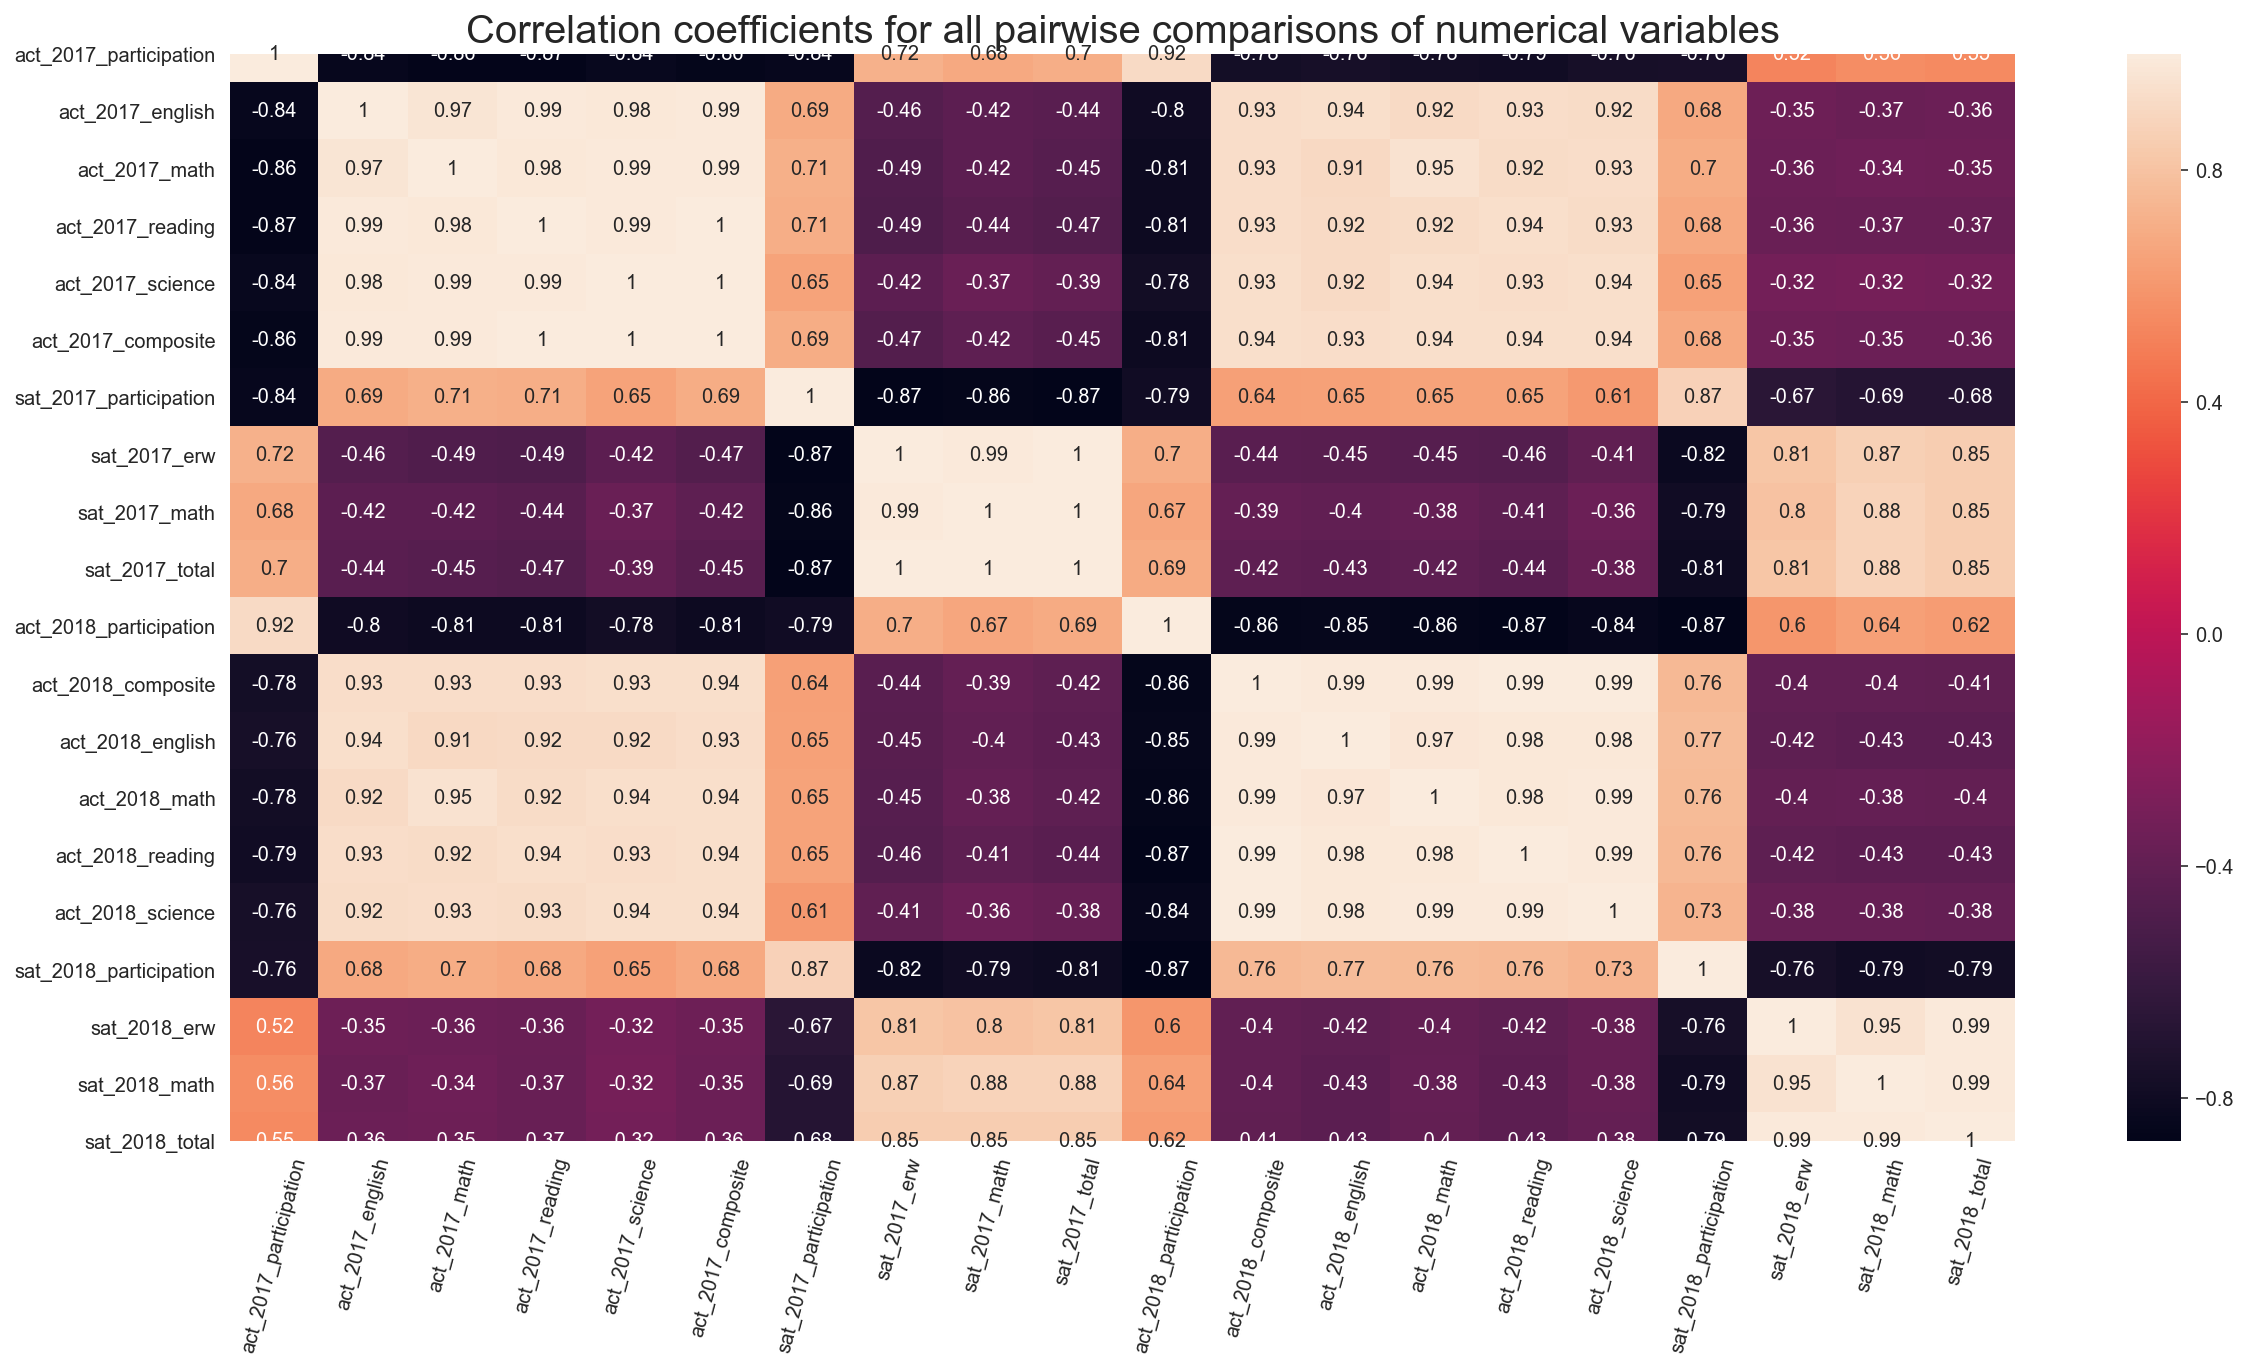

In [81]:
fig, ax = plt.subplots(figsize=(20,10))

plt.xticks(rotation=75)

plt.title('Correlation coefficients for all pairwise comparisons of numerical variables', fontsize=20)

sns.heatmap(final_df.corr(),annot=True)

In [82]:
sns.pairplot(final_df); #An additional but optional plot just for own exploration.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [125]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)); # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,10)); # You'll want to specify your figsize
    fig.tight_layout(pad=5.0)
    ax = ax.ravel(); # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]); # feel free to add more settings
        ax[i].set_title(column,fontsize=20);# Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(column,fontsize=15);

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [69]:
final_df['sat_2017_math'].value_counts()

541    2
604    2
551    2
524    2
553    2
531    1
591    1
533    1
468    1
595    1
594    1
556    1
528    1
526    1
535    1
651    1
586    1
548    1
520    1
649    1
517    1
515    1
603    1
534    1
621    1
52     1
495    1
635    1
570    1
625    1
532    1
521    1
628    1
499    1
497    1
631    1
572    1
493    1
492    1
616    1
614    1
523    1
507    1
607    1
561    1
512    1
Name: sat_2017_math, dtype: int64

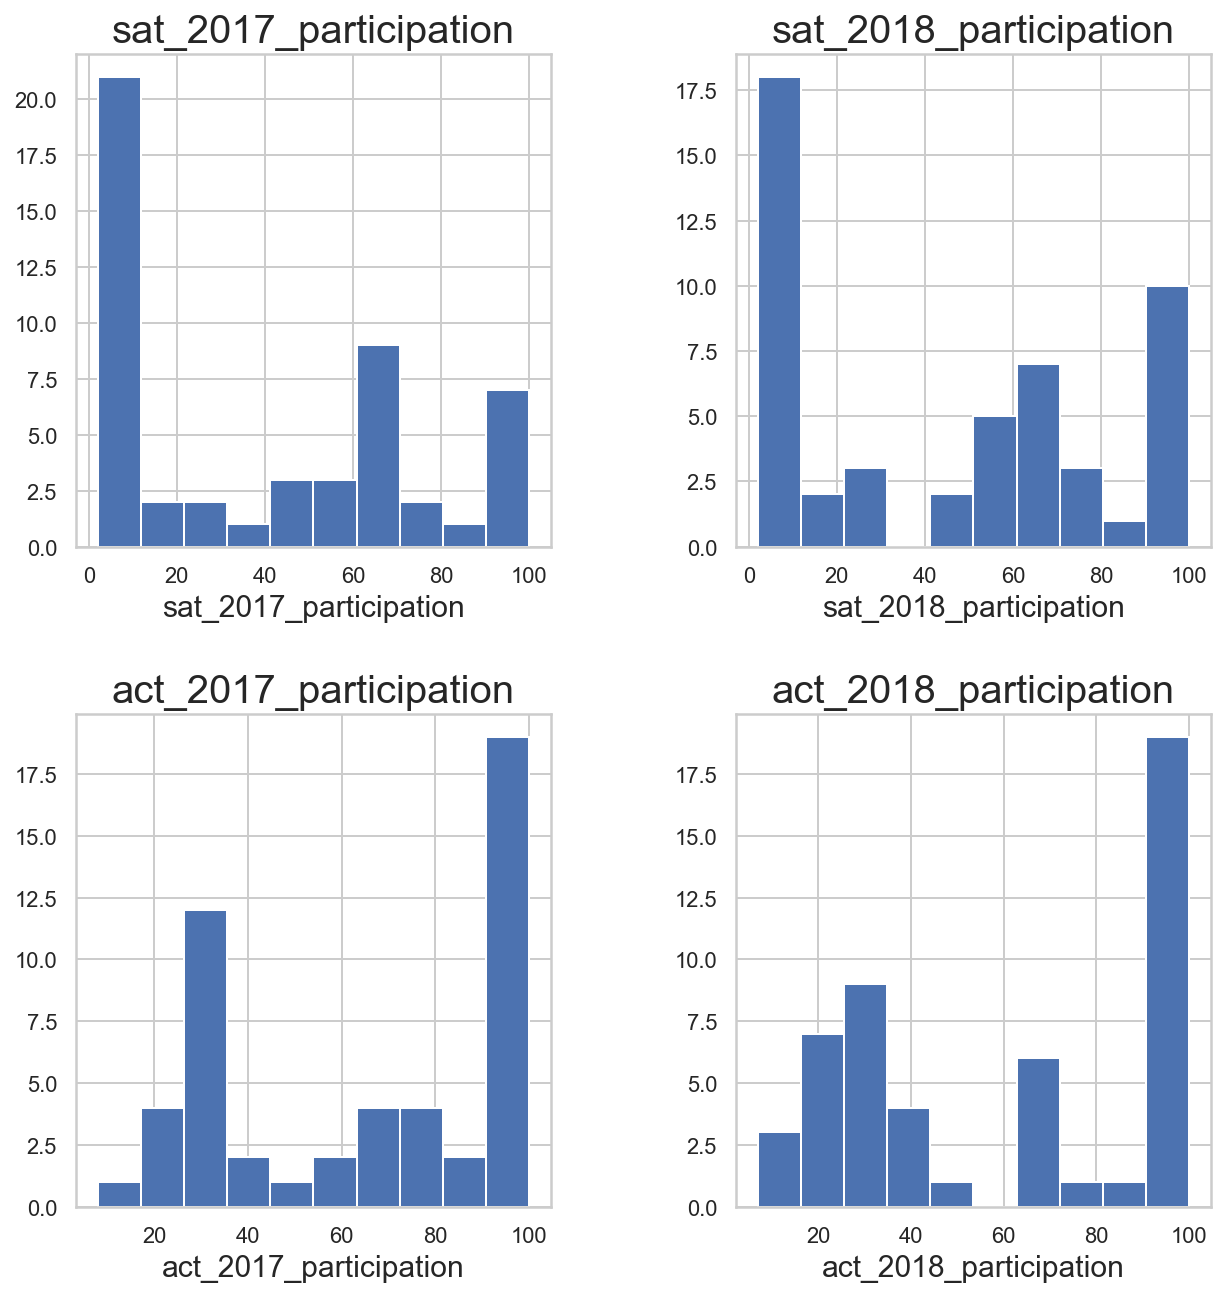

In [126]:
# Code
subplot_histograms(final_df,['sat_2017_participation','sat_2018_participation',
                             'act_2017_participation','act_2018_participation'],
                   ['sat_2017_participation','sat_2018_participation',
                    'act_2017_participation','act_2018_participation'],
                   ['sat_2017_participation','sat_2018_participation',
                    'act_2017_participation','act_2018_participation']);

### Interpretation of SAT and ACT 2017 and 2018 participation rates' histogram distributions:

None of the distributions are normally distributed based on a coarse visual inspection. All 4 distributions appear to be multi-modal - all appear to be trimodal.

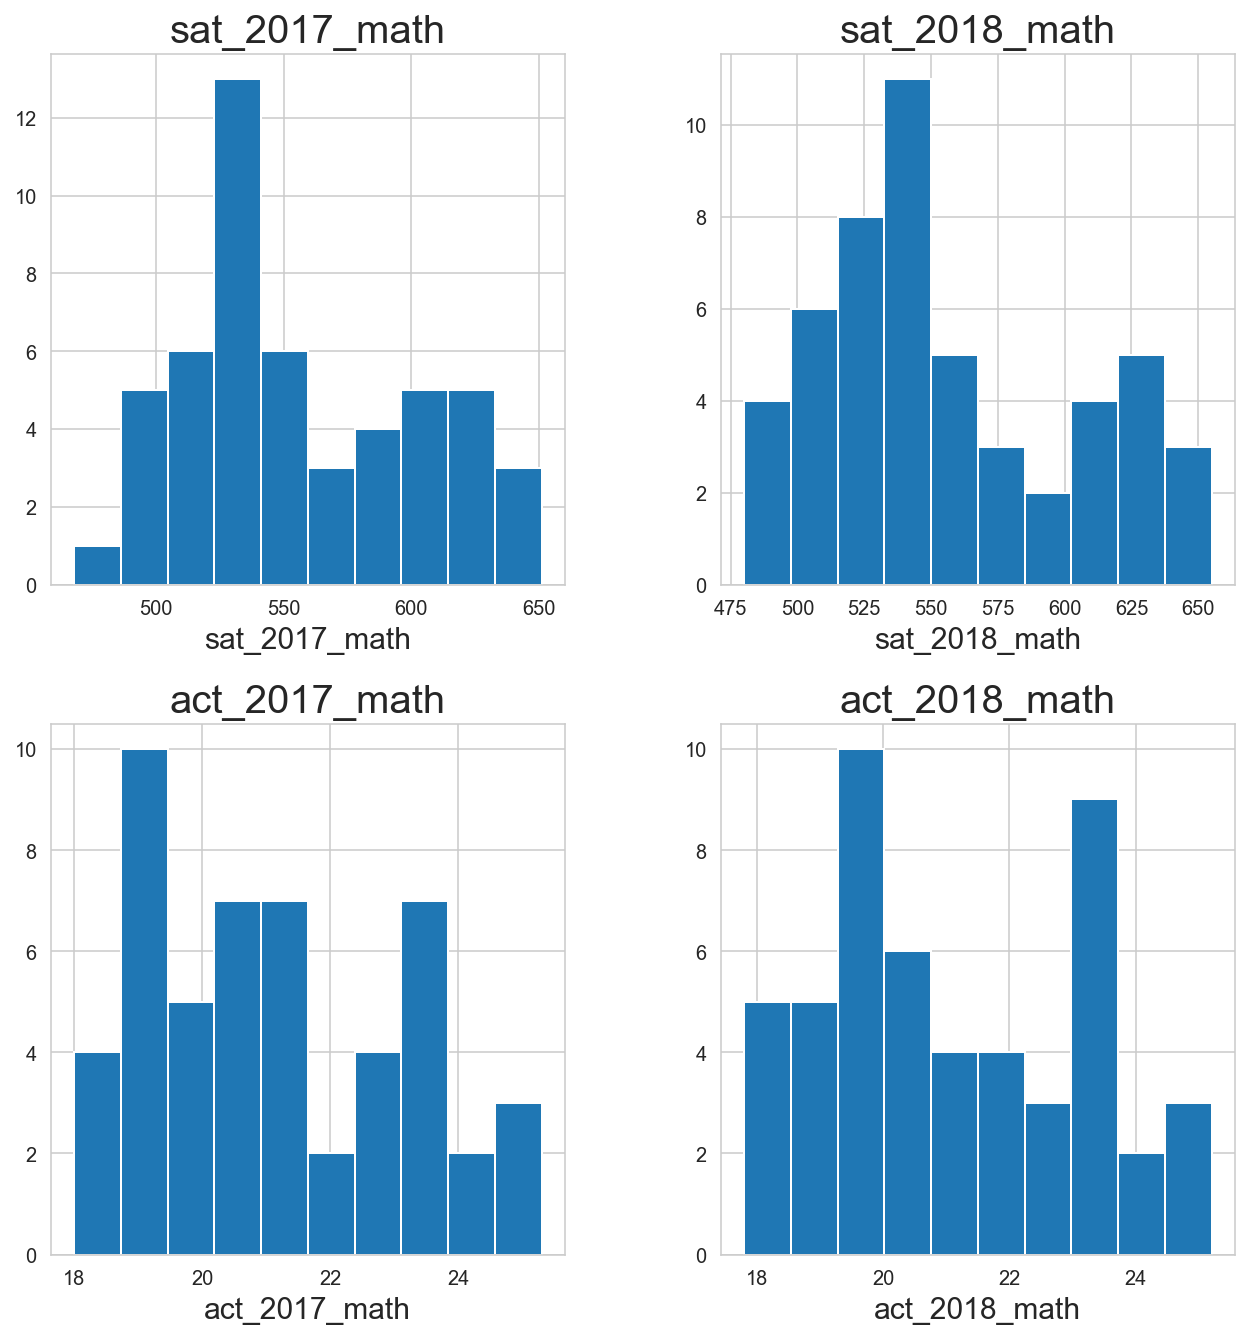

In [85]:
subplot_histograms(final_df,['sat_2017_math','sat_2018_math','act_2017_math','act_2018_math'],
                   ['sat_2017_math','sat_2018_math','act_2017_math','act_2018_math'],
                   ['sat_2017_math','sat_2018_math','act_2017_math','act_2018_math']);

### Interpretation of SAT and ACT 2017 and 2018 math scores' histogram distributions:

None of the distributions are normally distributed based on a coarse visual inspection. All 4 distributions appear to be multi-modal - all appear to be bimodal except for sat_2017_math, which appears to be strongly left skewed due to the presence of some outliers.

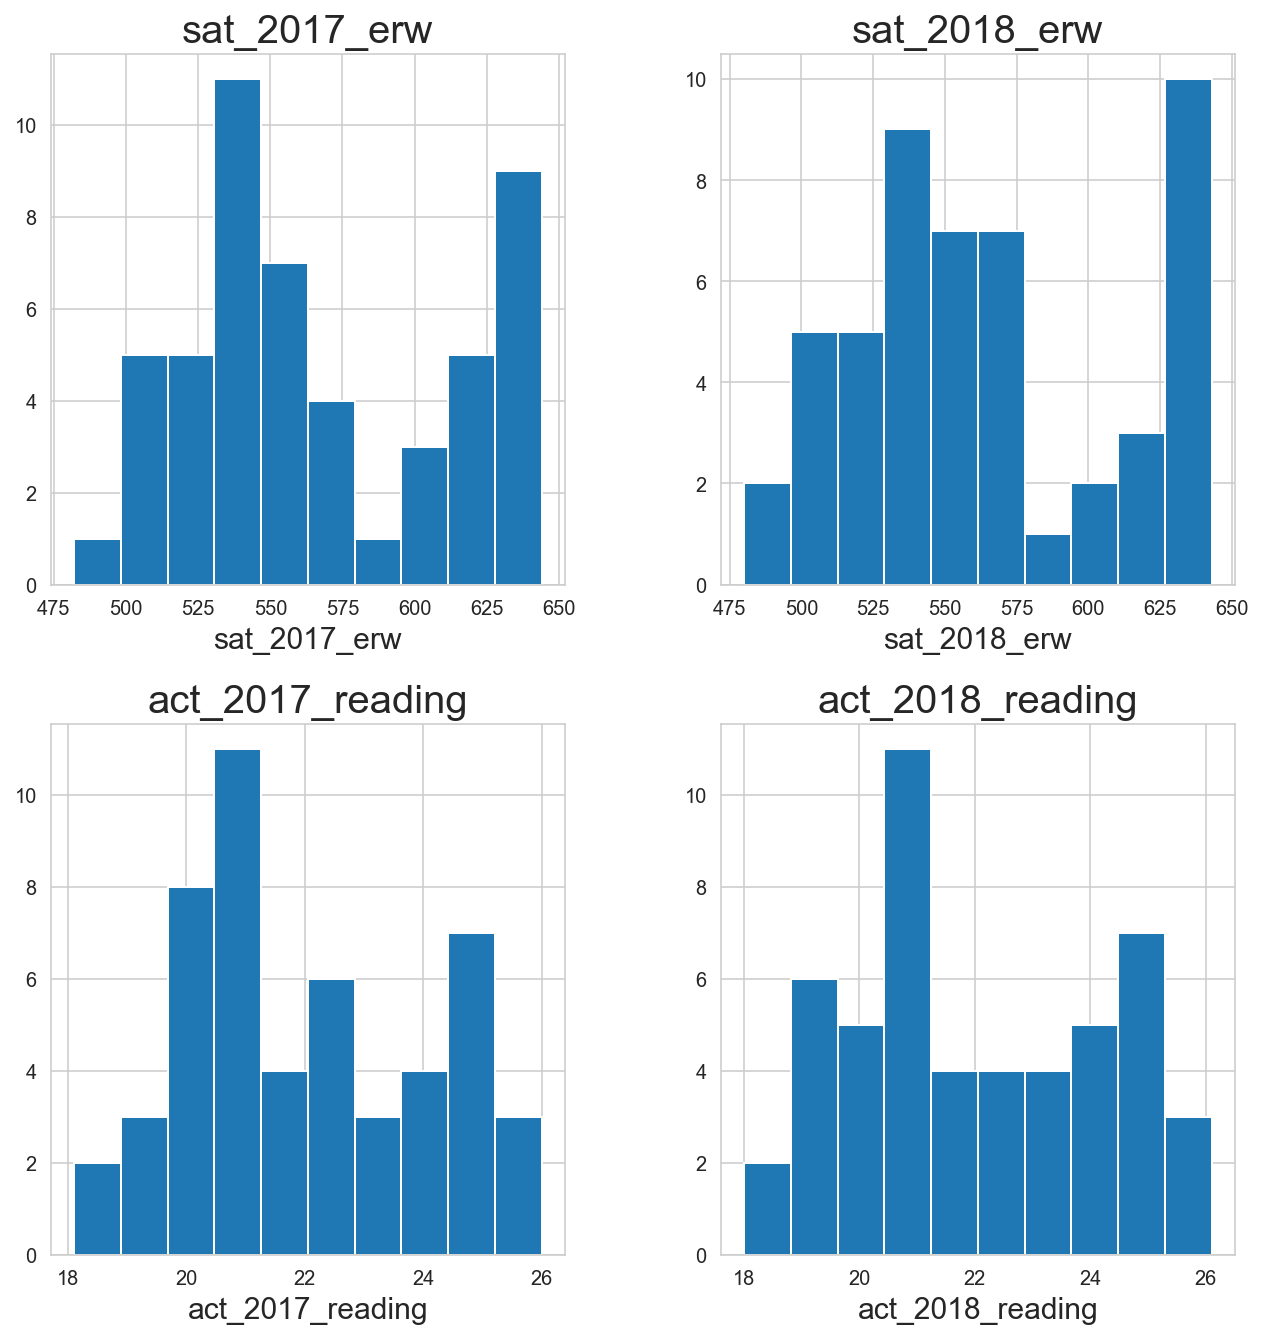

In [86]:
subplot_histograms(final_df,['sat_2017_erw','sat_2018_erw',
                             'act_2017_reading','act_2018_reading'],
                   ['sat_2017_erw','sat_2018_erw',
                    'act_2017_reading','act_2018_reading'],
                   ['sat_2017_erw','sat_2018_erw',
                    'act_2017_reading','act_2018_reading']);

### Interpretation of SAT and ACT 2017 and 2018 erw and reading (respectively) scores' histogram distributions:

None of the distributions are normally distributed based on a coarse visual inspection. All appear bimodal except for act_2017_reading which appears to have a third mode between score 20 and score 24. 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [121]:
# Code

def subplot_scatter(dataframe, list_of_columns):
    nrows = (len(list_of_columns));
    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize=(10,65)); 
    ax = ax.ravel();
    fig.tight_layout(pad=6.0)
    for i, column in enumerate(list_of_columns):
        ax[i].scatter(x=dataframe[column[0]], y=dataframe[column[1]], color='dodgerblue', s=100); 
        ax[i].set_title(column[0]+' vs '+column[1],fontsize=20);
        ax[i].set_xlabel(column[0],fontsize=15);
        ax[i].set_ylabel(column[1],fontsize=15);

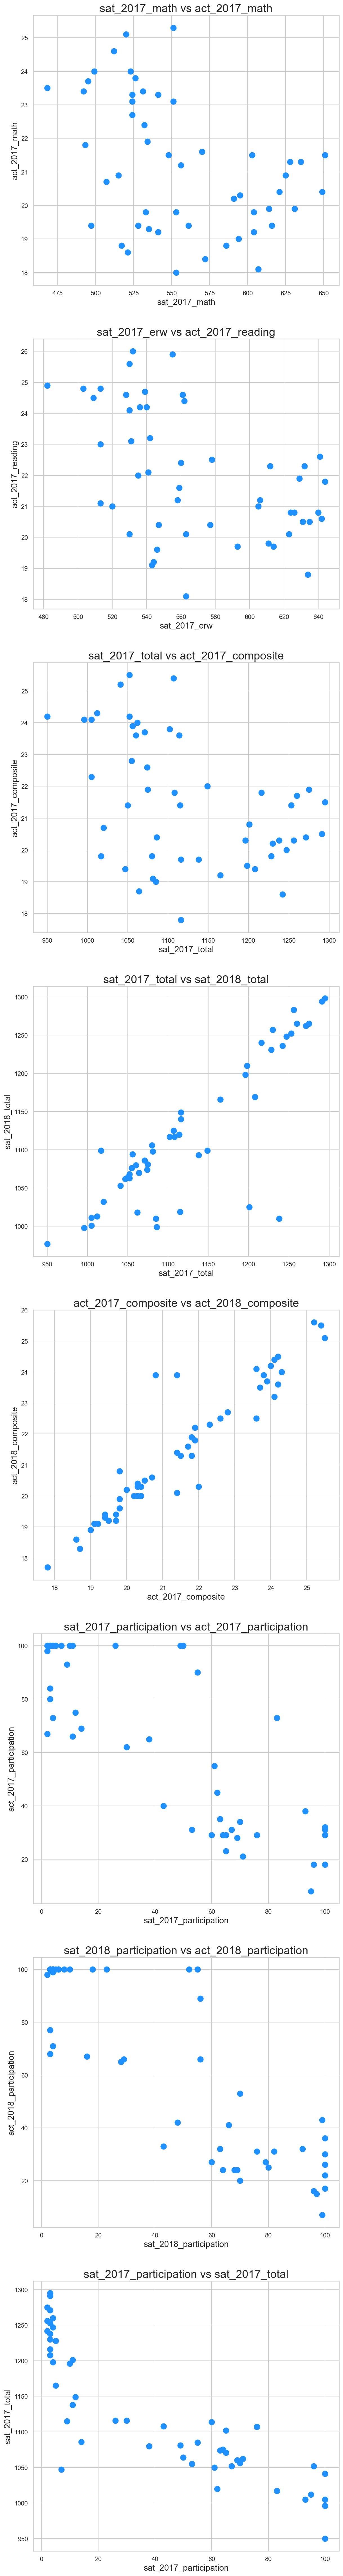

In [122]:
subplot_scatter(final_df, [['sat_2017_math','act_2017_math'],
                           ['sat_2017_erw','act_2017_reading'],
                           ['sat_2017_total','act_2017_composite'],
                           ['sat_2017_total','sat_2018_total'],
                           ['act_2017_composite','act_2018_composite'],
                           ['sat_2017_participation','act_2017_participation'],
                           ['sat_2018_participation','act_2018_participation'],
                           ['sat_2017_participation','sat_2017_total']])

### Interpretations of scatter plots:

SAT and ACT math for 2017: There appears to be a slight negative correlation between SAT 2017 and ACT 2017 and there appears to be an outlier for SAT 2017 math's score (score<100). On closer examination, I noticed that row 20, column on 'sat_2017_math' has an unusually low score as shown below, which is below the minimum score (200) for a SAT section which I failed to spot earlier with the ```.describe()``` method but which has been flagged up by the scatter plot.

In [89]:
final_df.iloc[19:22][['state', 'sat_2017_erw','sat_2017_math','sat_2017_total']]

state  sat_2017_erw  sat_2017_math  sat_2017_total
19          Maine           513            499            1012
20       Maryland           536            524            1060
21  Massachusetts           555            551            1107

Upon comparison with published SAT 2017 scores (https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/), noticed that the correct SAT 2017 Math score for Maryland should be 524 instead of just 52. The index of column, 'sat_2017_math' was obtained using ```.get_loc()``` as follows, and re-assigning the correct value, 524, into that locus.

In [373]:
final_df.columns.get_loc('sat_2017_math')

9

In [77]:
final_df.iloc[20,9]=524

In [78]:
final_df.iloc[20,9]

524

In [377]:
final_df.iloc[19:22][['state', 'sat_2017_erw','sat_2017_math','sat_2017_total']]

state  sat_2017_erw  sat_2017_math  sat_2017_total
19          Maine           513            499            1012
20       Maryland           536            524            1060
21  Massachusetts           555            551            1107

SAT and ACT math for 2017: Upon correcting Maryland's SAT 2017 Math score from 52 to the correct 524 and re-generating the scatterplot, there appears to be a slight negative correlation between SAT and ACT math scores for 2017.

SAT erw and ACT reading score for 2017: There appears to be a slight negative correlation between SAT erw and ACT reading scores in 2017.

ACT 2017 composite and SAT 2017 total: There appears to be a slight negative correlation between ACT 2017 composite and SAT 2017 total scores.

SAT 2017 and SAT 2018 totals: There appears to be a rather strong positive correlation between SAT 2017 and SAT 2018 total scores.

ACT 2017 and ACT 2018 composite scores: There appears to be a rather strong positive correlation between ACT 2017 and ACT 2018 composite scores.

There also appears to be an inverse relationship between ACT and SAT participation rates, which correlates with the numerical summaries above that showed Iowa coming in within top 3 in terms of SAT'17 total score but scoring poorly in the bottom 3 in terms of SAT'17 participation rate. An inverse relationship is also reflected between SAT total score and SAT participation rate as shown in the scatterplot above.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [90]:
df_sat_17_subj=final_df[['sat_2017_erw','sat_2017_math']]

In [383]:
final_df.head()

state  act_2017_participation  act_2017_english  act_2017_math  \
0     Alabama                     100              18.9           18.4   
1      Alaska                      65              18.7           19.8   
2     Arizona                      62              18.6           19.8   
3    Arkansas                     100              18.9           19.0   
4  California                      31              22.5           22.7   

   act_2017_reading  act_2017_science  act_2017_composite  \
0              19.7              19.4                19.2   
1              20.4              19.9                19.8   
2              20.1              19.8                19.7   
3              19.7              19.5                19.4   
4              23.1              22.2                22.8   

   sat_2017_participation  sat_2017_erw  sat_2017_math  ...  \
0                       5           593            572  ...   
1                      38           547            533  ...   
2                      30           563            553  ...   
3                       3           614            594  ...   
4                      53           531            524  ...   

   act_2018_composite  act_2018_english  act_2018_math  act_2018_reading  \
0                19.1              18.9           18.3              19.6   
1                20.8              19.8           20.6              21.6   
2                19.2              18.2           19.4              19.5   
3                19.4              19.1           18.9              19.7   
4                22.7              22.5           22.5              23.0   

   act_2018_science  sat_2018_participation  sat_2018_erw  sat_2018_math  \
0              19.0                       6           595            571   
1              20.7                      43           562            544   
2              19.2                      29           577            572   
3              19.4                       5           592            576   
4              22.1                      60           540            536   

   sat_2018_total  index  
0            1166      1  
1            1106      2  
2            1149      3  
3            1169      4  
4            1076      5  

[5 rows x 22 columns]

In [91]:
df_sat_1718_total=final_df[['sat_2017_total','sat_2018_total']]

In [92]:
df_act_17_subj=final_df[['act_2017_english','act_2017_math','act_2017_reading','act_2017_science','act_2017_composite']]

In [93]:
# Code
sns.set(style="whitegrid")
ax = sns.boxplot(data=df_act_17_subj,orient='h')
ax.set_title('ACT 2017 Sub-Test Scores',fontsize=20)
ax.set_xlabel('Scores',fontsize=15);
ax.set_yticklabels({"ACT'17 Eng":'act_2017_english',
                    "ACT'17 Math":'act_2017_math',
                    "ACT'17 Reading":'act_2017_reading',
                    "ACT'17 Science":'act_2017_science',
                    "ACT'17 Composite":'act_2017_total'});

### Interpretation for the ACT 2017 Sub-Test Scores' boxplot:

Noticed an extreme outlier under 'ACT'17 Science' category and re-examined the dataframe as follows. Flagged out row 20 column 5, for Maryland, where the 'ACT'17 Science' mean score is 2.3. Compared the dataframe with published ACT 2017 Scores by state (https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf) and realized the ACT'17 Science score for Maryland should be 23.2 instead of 2.3. As such, I re-assigned the 'ACT'17 Science' value for Maryland the same way I did for 'SAT'17 Math' score as follows. Re-plotted the boxplot afterwards and obtained the above.

In [94]:
final_df[['state','act_2017_english','act_2017_math','act_2017_reading','act_2017_science','act_2017_composite']]

state  act_2017_english  act_2017_math  act_2017_reading  \
0                Alabama              18.9           18.4              19.7   
1                 Alaska              18.7           19.8              20.4   
2                Arizona              18.6           19.8              20.1   
3               Arkansas              18.9           19.0              19.7   
4             California              22.5           22.7              23.1   
5               Colorado              20.1           20.3              21.2   
6            Connecticut              25.5           24.6              25.6   
7               Delaware              24.1           23.4              24.8   
8   District of Columbia              24.4           23.5              24.9   
9                Florida              19.0           19.4              21.0   
10               Georgia              21.0           20.9              22.0   
11                Hawaii              17.8           19.2              19.2   
12                 Idaho              21.9           21.8              23.0   
13              Illinois              21.0           21.2              21.6   
14               Indiana              22.0           22.4              23.2   
15                  Iowa              21.2           21.3              22.6   
16                Kansas              21.1           21.3              22.3   
17              Kentucky              19.6           19.4              20.5   
18             Louisiana              19.4           18.8              19.8   
19                 Maine              24.2           24.0              24.8   
20              Maryland              23.3           23.1              24.2   
21         Massachusetts              25.4           25.3              25.9   
22              Michigan              24.1           23.7              24.5   
23             Minnesota              20.4           21.5              21.8   
24           Mississippi              18.2           18.1              18.8   
25              Missouri              19.8           19.9              20.8   
26               Montana              19.0           20.2              21.0   
27              Nebraska              20.9           20.9              21.9   
28                Nevada              16.3           18.0              18.1   
29         New Hampshire              25.4           25.1              26.0   
30            New Jersey              23.8           23.8              24.1   
31            New Mexico              18.6           19.4              20.4   
32              New York              23.8           24.0              24.6   
33        North Carolina              17.8           19.3              19.6   
34          North Dakota              19.0           20.4              20.5   
35                  Ohio              21.2           21.6              22.5   
36              Oklahoma              18.5           18.8              20.1   
37                Oregon              21.2           21.5              22.4   
38          Pennsylvania              23.4           23.4              24.2   
39          Rhode Island              24.0           23.3              24.7   
40        South Carolina              17.5           18.6              19.1   
41          South Dakota              20.7           21.5              22.3   
42             Tennessee              19.5           19.2              20.1   
43                 Texas              19.5           20.7              21.1   
44                  Utah              19.5           19.9              20.8   
45               Vermont              23.3           23.1              24.4   
46              Virginia              23.5           23.3              24.6   
47            Washington              20.9           21.9              22.1   
48         West Virginia              20.0           19.4              21.2   
49             Wisconsin              19.7           20.4            

In [391]:
act_2017_df

state  act_2017_participation  act_2017_english  \
1                Alabama                     100              18.9   
2                 Alaska                      65              18.7   
3                Arizona                      62              18.6   
4               Arkansas                     100              18.9   
5             California                      31              22.5   
6               Colorado                     100              20.1   
7            Connecticut                      31              25.5   
8               Delaware                      18              24.1   
9   District of Columbia                      32              24.4   
10               Florida                      73              19.0   
11               Georgia                      55              21.0   
12                Hawaii                      90              17.8   
13                 Idaho                      38              21.9   
14              Illinois                      93              21.0   
15               Indiana                      35              22.0   
16                  Iowa                      67              21.2   
17                Kansas                      73              21.1   
18              Kentucky                     100              19.6   
19             Louisiana                     100              19.4   
20                 Maine                       8              24.2   
21              Maryland                      28              23.3   
22         Massachusetts                      29              25.4   
23              Michigan                      29              24.1   
24             Minnesota                     100              20.4   
25           Mississippi                     100              18.2   
26              Missouri                     100              19.8   
27               Montana                     100              19.0   
28              Nebraska                      84              20.9   
29                Nevada                     100              16.3   
30         New Hampshire                      18              25.4   
31            New Jersey                      34              23.8   
32            New Mexico                      66              18.6   
33              New York                      31              23.8   
34        North Carolina                     100              17.8   
35          North Dakota                      98              19.0   
36                  Ohio                      75              21.2   
37              Oklahoma                     100              18.5   
38                Oregon                      40              21.2   
39          Pennsylvania                      23              23.4   
40          Rhode Island                      21              24.0   
41        South Carolina                     100              17.5   
42          South Dakota                      80              20.7   
43             Tennessee                     100              19.5   
44                 Texas                      45              19.5   
45                  Utah                     100              19.5   
46               Vermont                      29              23.3   
47              Virginia                      29              23.5   
48            Washington                      29              20.9   
49         West Virginia                      69              20.0   
50             Wisconsin                     100              19.7   
51               Wyoming                     100              19.4   

    act_2017_math  act_2017_reading  act_2017_science  act_2017_composite  
1            18.4              19.7              19.4                19.2  
2            19.8              20.4              19.9                19.8  
3            19.8              20.1              19.8                19.7  
4            19.0              19.7              19.5                19.4 

In [392]:
final_df.columns.get_loc('act_2017_science')

5

In [79]:
final_df.iloc[20,5]=23.2

In [80]:
final_df.iloc[20,5]

23.2

In [483]:
final_df[['state','act_2017_science']]

state  act_2017_science
0                Alabama              19.4
1                 Alaska              19.9
2                Arizona              19.8
3               Arkansas              19.5
4             California              22.2
5               Colorado              20.9
6            Connecticut              24.6
7               Delaware              23.6
8   District of Columbia              23.5
9                Florida              19.4
10               Georgia              21.3
11                Hawaii              19.3
12                 Idaho              22.1
13              Illinois              21.3
14               Indiana              22.3
15                  Iowa              22.1
16                Kansas              21.7
17              Kentucky              20.1
18             Louisiana              19.6
19                 Maine              23.7
20              Maryland              23.2
21         Massachusetts              24.7
22              Michigan              23.8
23             Minnesota              21.6
24           Mississippi              18.8
25              Missouri              20.5
26               Montana              20.5
27              Nebraska              21.5
28                Nevada              18.2
29         New Hampshire              24.9
30            New Jersey              23.2
31            New Mexico              20.0
32              New York              23.9
33        North Carolina              19.3
34          North Dakota              20.6
35                  Ohio              22.0
36              Oklahoma              19.6
37                Oregon              21.7
38          Pennsylvania              23.3
39          Rhode Island              23.4
40        South Carolina              18.9
41          South Dakota              22.0
42             Tennessee              19.9
43                 Texas              20.9
44                  Utah              20.6
45               Vermont              23.2
46              Virginia              23.5
47            Washington              22.0
48         West Virginia              20.5
49             Wisconsin              20.9
50               Wyoming              20.6

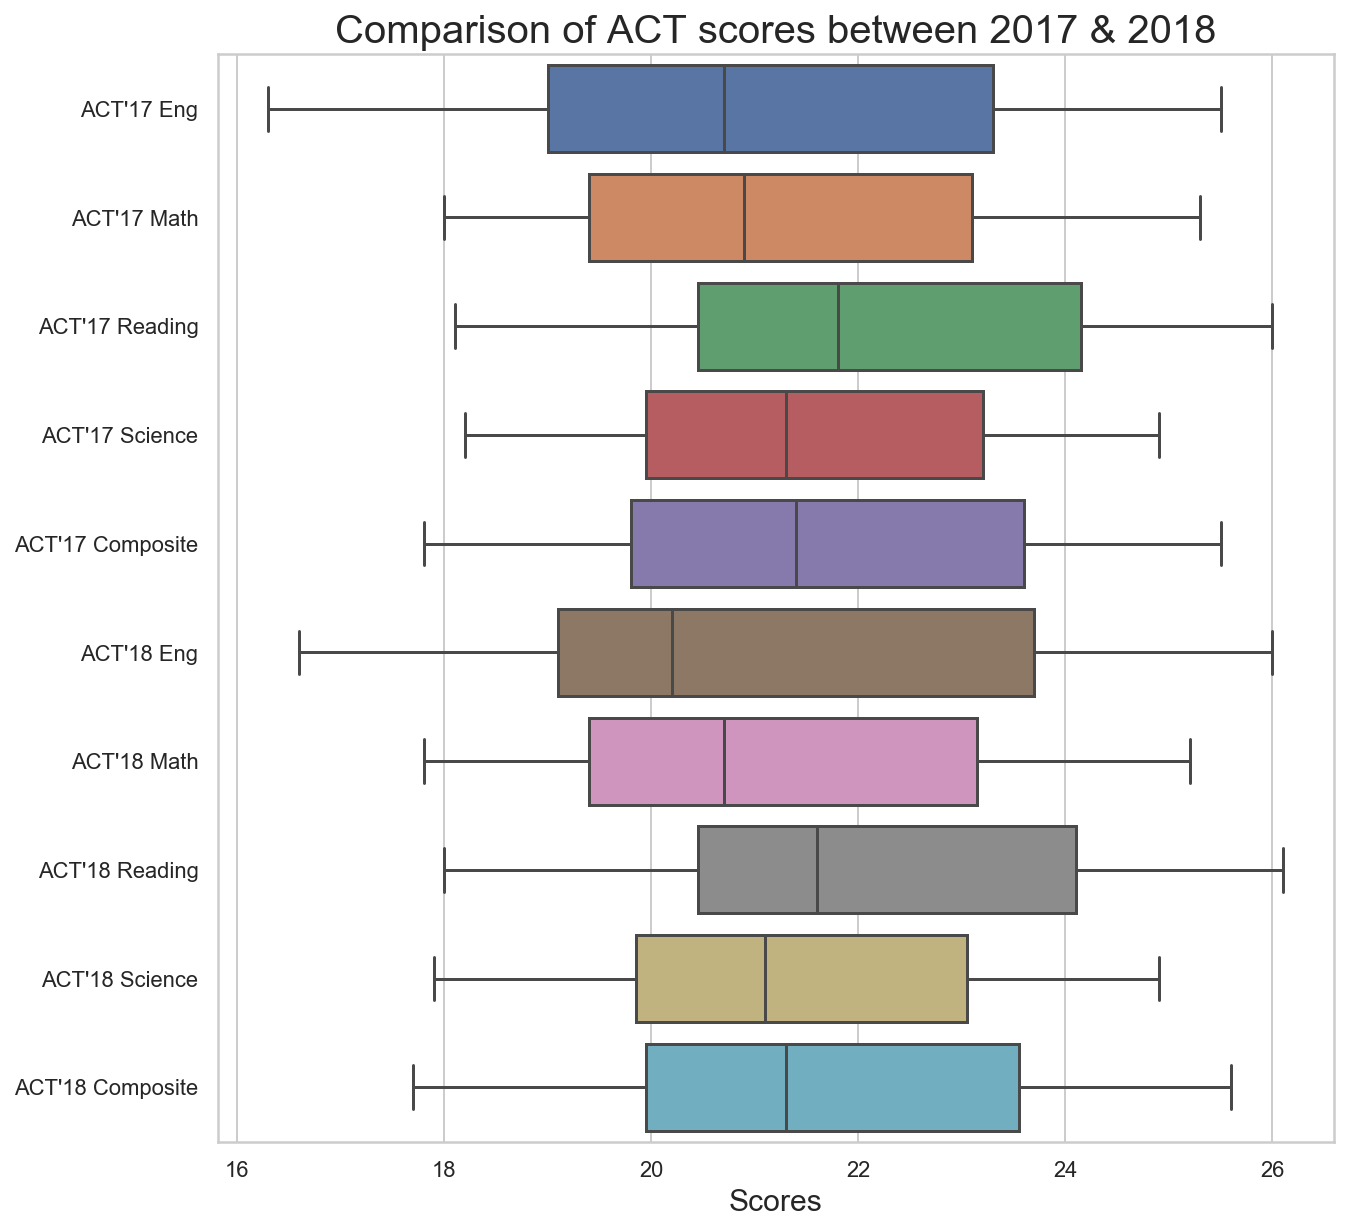

In [95]:
df_act_1718_subj = final_df[['act_2017_english','act_2017_math','act_2017_reading','act_2017_science','act_2017_composite',
                            'act_2018_english','act_2018_math','act_2018_reading','act_2018_science','act_2018_composite']]


plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
ax = sns.boxplot(data=df_act_1718_subj,orient='h')
ax.set_title('Comparison of ACT scores between 2017 & 2018',fontsize=20)
ax.set_xlabel('Scores',fontsize=15)
ax.set_yticklabels({"ACT'17 Eng":'act_2017_english',
                    "ACT'17 Math":'act_2017_math',
                    "ACT'17 Reading":'act_2017_reading',
                    "ACT'17 Science":'act_2017_science',
                    "ACT'17 Composite":'act_2017_composite',
                    "ACT'18 Eng":'act_2018_english',
                    "ACT'18 Math":'act_2018_math',
                    "ACT'18 Reading":'act_2018_reading',
                    "ACT'18 Science":'act_2018_science',
                    "ACT'18 Composite":'act_2018_composite'});

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

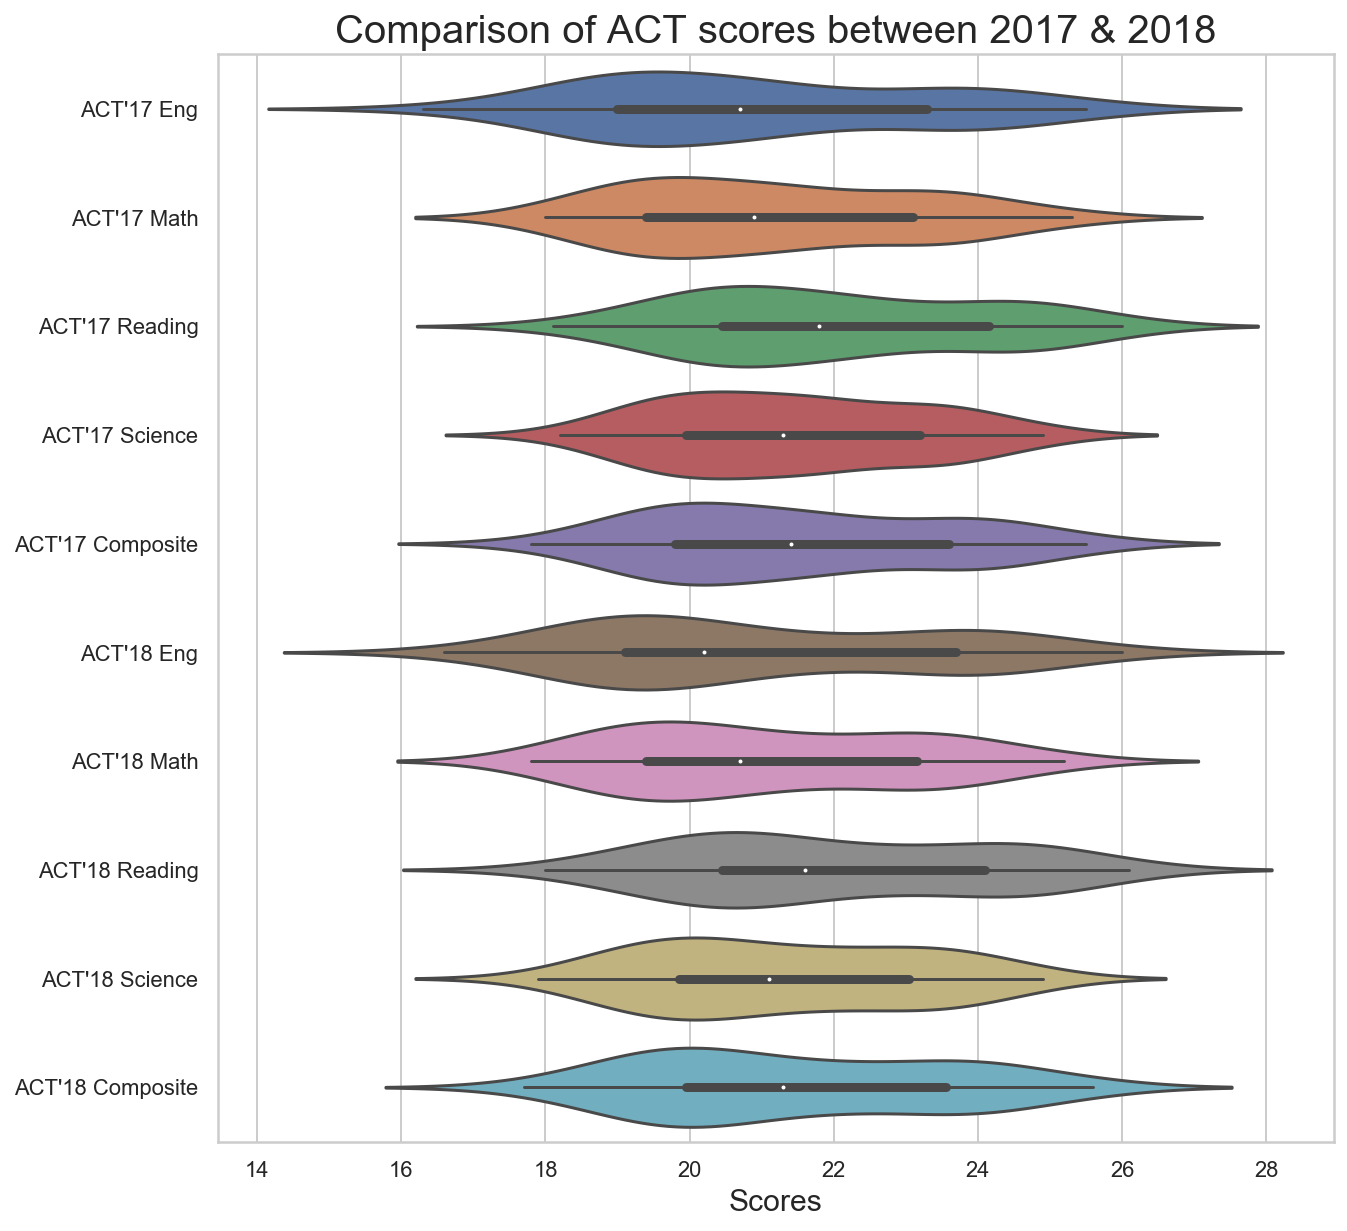

In [98]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
ax = sns.violinplot(data=df_act_1718_subj,orient='h')
ax.set_title('Comparison of ACT scores between 2017 & 2018',fontsize=20)
ax.set_xlabel('Scores',fontsize=15)
ax.set_yticklabels({"ACT'17 Eng":'act_2017_english',
                    "ACT'17 Math":'act_2017_math',
                    "ACT'17 Reading":'act_2017_reading',
                    "ACT'17 Science":'act_2017_science',
                    "ACT'17 Composite":'act_2017_composite',
                    "ACT'18 Eng":'act_2018_english',
                    "ACT'18 Math":'act_2018_math',
                    "ACT'18 Reading":'act_2018_reading',
                    "ACT'18 Science":'act_2018_science',
                    "ACT'18 Composite":'act_2018_composite'});

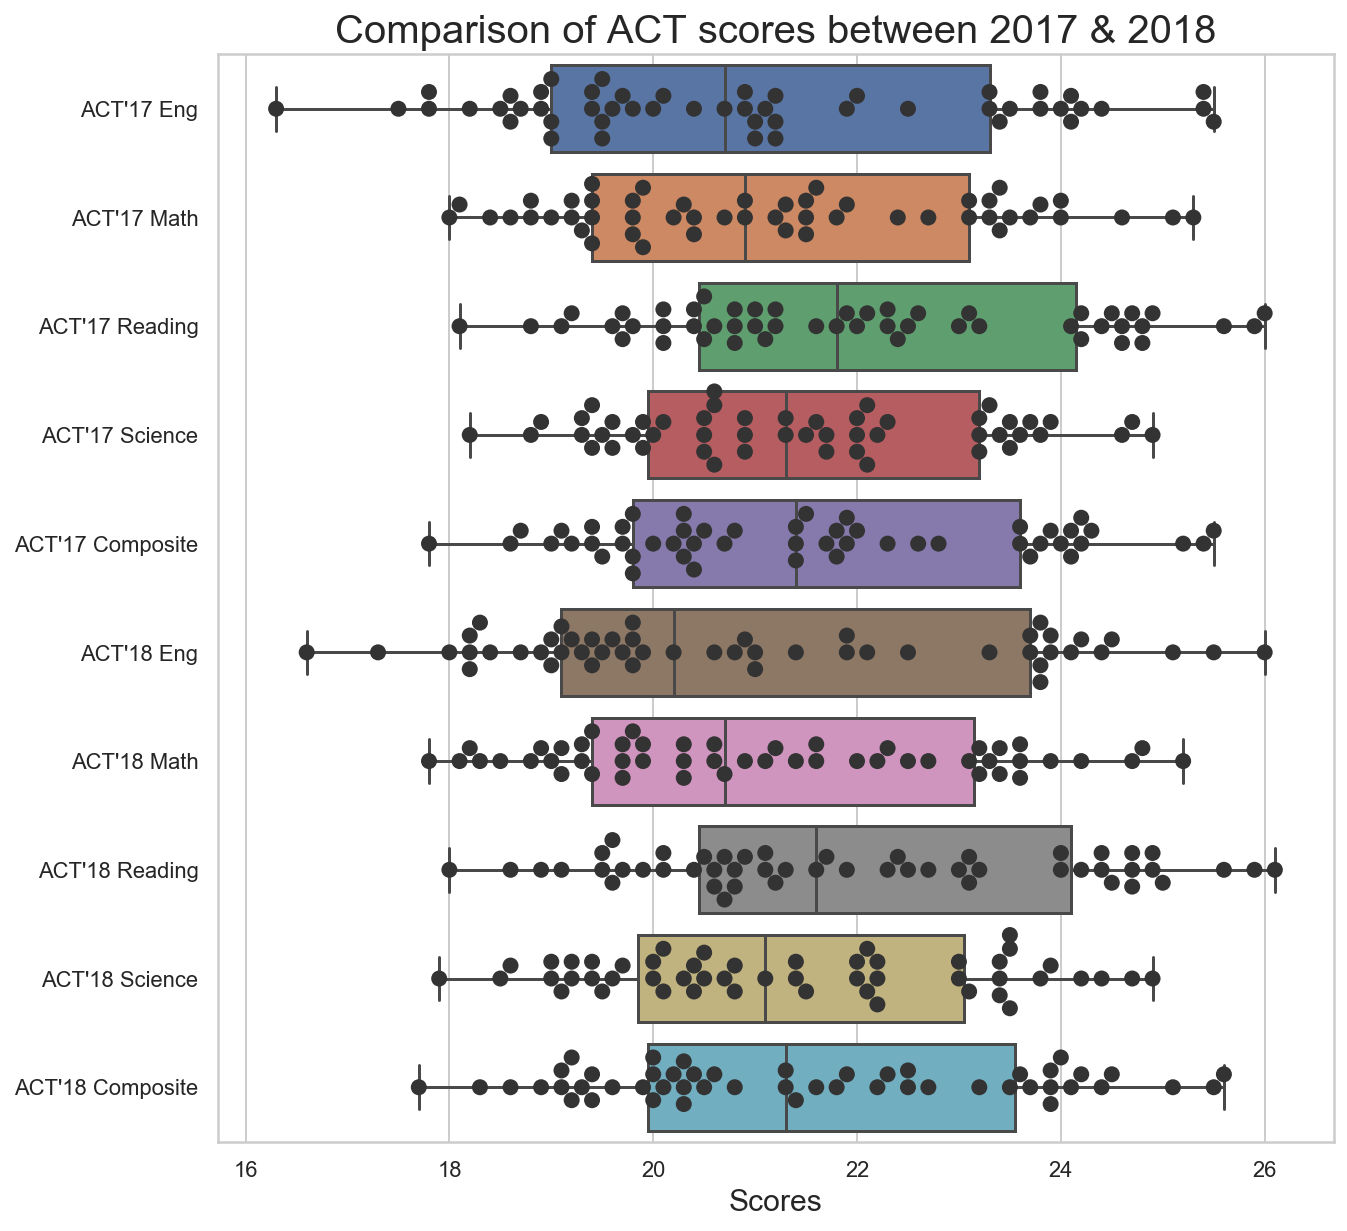

In [99]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
ax = sns.boxplot(data=df_act_1718_subj,orient='h')
ax = sns.swarmplot(data=df_act_1718_subj,orient='h',color=".2",s = 8)
ax.set_title('Comparison of ACT scores between 2017 & 2018',fontsize=20)
ax.set_xlabel('Scores',fontsize=15)
ax.set_yticklabels({"ACT'17 Eng":'act_2017_english',
                    "ACT'17 Math":'act_2017_math',
                    "ACT'17 Reading":'act_2017_reading',
                    "ACT'17 Science":'act_2017_science',
                    "ACT'17 Composite":'act_2017_composite',
                    "ACT'18 Eng":'act_2018_english',
                    "ACT'18 Math":'act_2018_math',
                    "ACT'18 Reading":'act_2018_reading',
                    "ACT'18 Science":'act_2018_science',
                    "ACT'18 Composite":'act_2018_composite'});

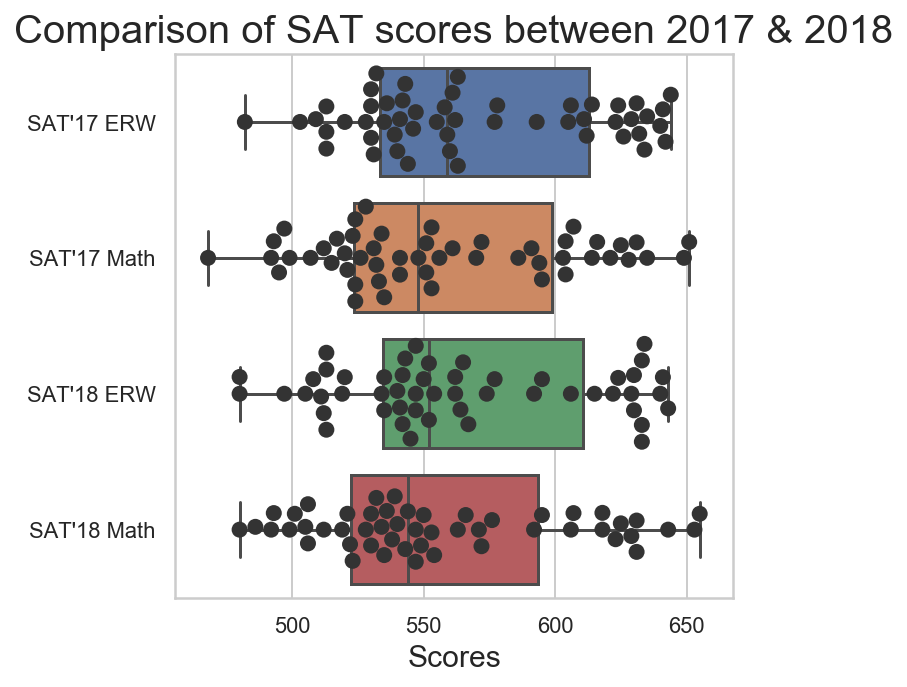

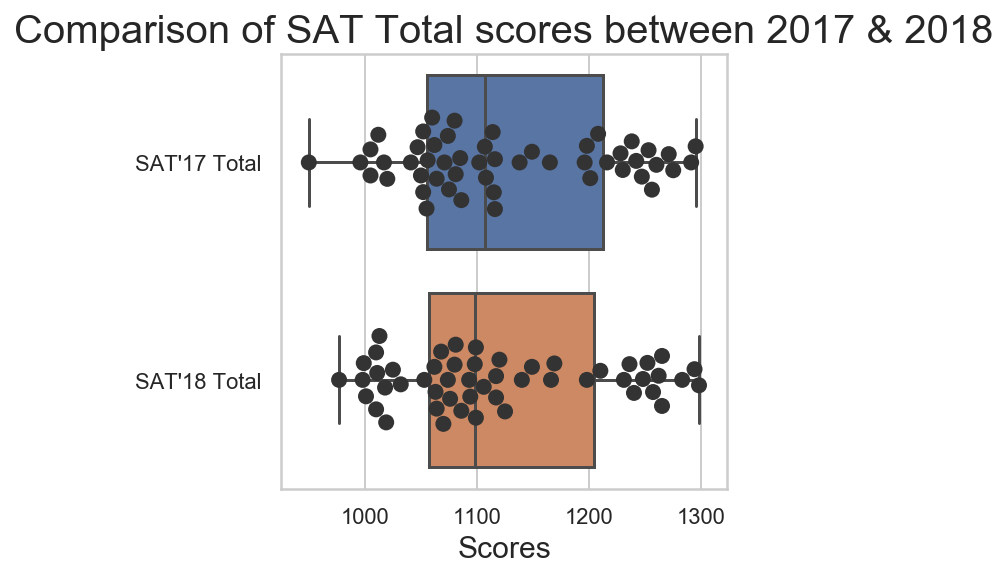

In [100]:
df_sat_1718_subj = final_df[['sat_2017_erw','sat_2017_math',
                            'sat_2018_erw','sat_2018_math']]

df_sat_1718_tot = final_df[['sat_2017_total','sat_2018_total']]

df_sat_act_1718_part = final_df[['sat_2017_participation','sat_2018_participation',
                                 'act_2017_participation','act_2018_participation']]


plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
ax = sns.boxplot(data=df_sat_1718_subj,orient='h')
ax = sns.swarmplot(data=df_sat_1718_subj,orient='h',color=".2", s = 8)
ax.set_title('Comparison of SAT scores between 2017 & 2018',fontsize=20)
ax.set_xlabel('Scores',fontsize=15)
ax.set_yticklabels({"SAT'17 ERW":'sat_2017_erw',
                    "SAT'17 Math":'sat_2017_math',
                    "SAT'18 ERW":'sat_2018_erw',
                    "SAT'18 Math":'sat_2018_math'});

plt.figure(figsize=(4,4))
sns.set(style="whitegrid")
ax = sns.boxplot(data=df_sat_1718_tot,orient='h')
ax = sns.swarmplot(data=df_sat_1718_tot,orient='h',color=".2", s = 8)
ax.set_title('Comparison of SAT Total scores between 2017 & 2018',fontsize=20)
ax.set_xlabel('Scores',fontsize=15)
ax.set_yticklabels({"SAT'17 Total":'sat_2017_total',
                    "SAT'18 Total":'sat_2018_total'});

plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
ax = sns.boxplot(data=df_sat_act_1718_part,orient='h')
ax = sns.swarmplot(data=df_sat_act_1718_part,orient='h',color=".2", s = 8)
ax.set_title('Comparison of SAT & ACT Participation rates in 2017 & 2018',fontsize=20)
ax.set_xlabel('Participation Rates',fontsize=15)
ax.set_yticklabels({"SAT'17 Participation":'sat_2017_participation',
                    "SAT'18 Participation":'sat_2018_participation',
                    "ACT'17 Participation":'act_2017_participation',
                    "ACT'18 Participation":'act_2018_participation'});

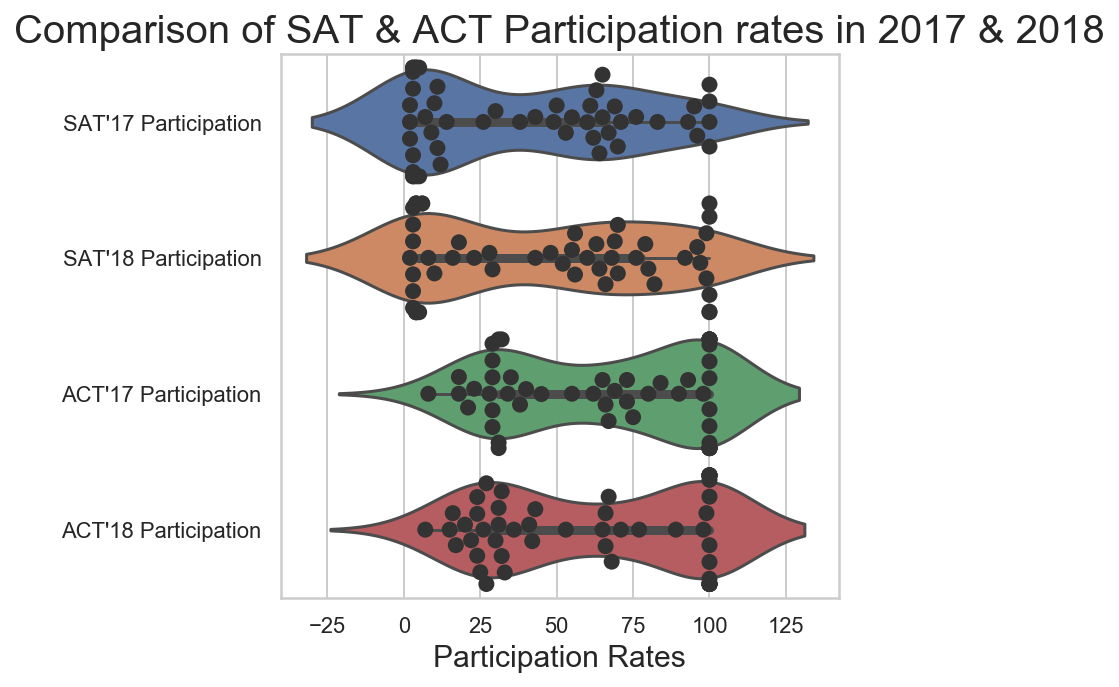

In [101]:
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
ax = sns.violinplot(data=df_sat_act_1718_part,orient='h')
ax = sns.swarmplot(data=df_sat_act_1718_part,orient='h',color=".2", s = 8)
ax.set_title('Comparison of SAT & ACT Participation rates in 2017 & 2018',fontsize=20)
ax.set_xlabel('Participation Rates',fontsize=15)
ax.set_yticklabels({"SAT'17 Participation":'sat_2017_participation',
                    "SAT'18 Participation":'sat_2018_participation',
                    "ACT'17 Participation":'act_2017_participation',
                    "ACT'18 Participation":'act_2018_participation'});

### Interpretation of boxplots above:

Most of the boxplots, swarmplots, and violinplots depict non-normal distributions across tests, and sub-tests. Regarding the comparison between SAT'17, SAT'18, ACT'17, and ACT'18 participation rates, they align with the histogram plots above and clearly indicate the multimodal quality for each boxplot. Participation rates for SAT'17 and SAT'18 appear more right-skewed while those of ACT'17 and ACT'18 are more left-skewed. 50% of US states, as indicated by the respective IQR bars, are clustered in the lower participation rate zone for SAT'17 and SAT'18 while the opposite happens with ACT'17 and ACT'18. These observations are reinforced with the above violinplots and swarmplots. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [104]:
final_df.describe()

act_2017_participation  act_2017_english  act_2017_math  \
count               51.000000         51.000000      51.000000   
mean                65.254902         20.931373      21.182353   
std                 32.140842          2.353677       1.981989   
min                  8.000000         16.300000      18.000000   
25%                 31.000000         19.000000      19.400000   
50%                 69.000000         20.700000      20.900000   
75%                100.000000         23.300000      23.100000   
max                100.000000         25.500000      25.300000   

       act_2017_reading  act_2017_science  act_2017_composite  \
count         51.000000         51.000000           51.000000   
mean          22.013725         21.450980           21.519608   
std            2.067271          1.739353            2.020695   
min           18.100000         18.200000           17.800000   
25%           20.450000         19.950000           19.800000   
50%           21.800000         21.300000           21.400000   
75%           24.150000         23.200000           23.600000   
max           26.000000         24.900000           25.500000   

       sat_2017_participation  sat_2017_erw  sat_2017_math  sat_2017_total  \
count               51.000000     51.000000      51.000000       51.000000   
mean                39.803922    569.117647     556.882353     1126.098039   
std                 35.276632     45.666901      47.121395       92.494812   
min                  2.000000    482.000000     468.000000      950.000000   
25%                  4.000000    533.500000     523.500000     1055.500000   
50%                 38.000000    559.000000     548.000000     1107.000000   
75%                 66.000000    613.000000     599.000000     1212.000000   
max                100.000000    644.000000     651.000000     1295.000000   

       act_2018_participation  act_2018_composite  act_2018_english  \
count               51.000000           51.000000         51.000000   
mean                61.647059           21.486275         20.988235   
std                 34.080976            2.106278          2.446356   
min                  7.000000           17.700000         16.600000   
25%                 28.500000           19.950000         19.100000   
50%                 66.000000           21.300000         20.200000   
75%                100.000000           23.550000         23.700000   
max                100.000000           25.600000         26.000000   

       act_2018_math  act_2018_reading  act_2018_science  \
count      51.000000         51.000000         51.000000   
mean       21.125490         22.015686         21.345098   
std         2.035765          2.167245          1.870114   
min        17.800000         18.000000         17.900000   
25%        19.400000         20.450000         19.850000   
50%        20.700000         21.600000         21.100000   
75%        23.150000         24.100000         23.050000   
max        25.200000         26.100000         24.900000   

       sat_2018_participation  sat_2018_erw  sat_2018_math  sat_2018_total  
count               51.000000     51.000000      51.000000       51.000000  
mean                45.745098    563.686275     556.235294     1120.019608  
std                 37.314256     47.502627      47.772623       94.155083  
min                  2.000000    480.000000     480.000000      977.000000  
25%                  4.500000    534.500000     522.500000     1057.500000  
50%                 52.000000    552.000000     544.000000     1098.000000  
75%                 77.500000    610.500000     593.500000     1204.000000  
max                100.000000    643.000000     655.000000     1298.000000

Answers: 
All variables are largely multimodal and not normally distributed.

act_2017_participation: Slightly left-skewed as the mean,65.25 is left of the median, 69.00, and its spread is characterized by a std of 32.14, a min of 8.00, a max of 100.00, and an IQR of 100.00-31.00 (75%-25%)= 69.00.

act_2017_english: Slightly right-skewed as the mean,20.93 is right of the median, 20.70, and its spread is characterized by a std of 2.35, a min of 16.30, a max of 25.50, and an IQR of 23.30-19.00 (75%-25%)= 4.30. 

act_2017_math: Slightly right-skewed as the mean,21.18 is right of the median, 20.90, and its spread is characterized by a std of 1.98, a min of 18.00, a max of 25.30, and an IQR of 23.10-19.40 (75%-25%)= 3.70. 

act_2017_reading: Slightly right-skewed as the mean,22.01 is right of the median, 21.80, and its spread is characterized by a std of 2.07, a min of 18.10, a max of 26.00, and an IQR of 24.15-20.45 (75%-25%)= 3.70.

act_2017_science: Slightly right-skewed as the mean,21.45 is right of the median, 21.30, and its spread is characterized by a std of 1.74, a min of 18.20, a max of 24.90, and an IQR of 23.20-19.95 (75%-25%)= 3.25.

act_2017_composite: Slightly right-skewed as the mean,21.52 is right of the median, 21.40, and its spread is characterized by a std of 2.02, a min of 17.80, a max of 25.50, and an IQR of 23.60-19.80 (75%-25%)= 3.80.

sat_2017_participation: Slightly right-skewed as the mean,39.80 is right of the median, 38.00, and its spread is characterized by a std of 35.28, a min of 2.00, a max of 100.00, and an IQR of 66.00-4.00 (75%-25%)= 62.00.

sat_2017_erw: Slightly right-skewed as the mean,569.12 is right of the median, 559.00, and its spread is characterized by a std of 45.67, a min of 482.00, a max of 644.00, and an IQR of 613.00-533.50 (75%-25%)= 79.50.

sat_2017_math: Slightly right-skewed as the mean,556.88 is right of the median, 548.00, and its spread is characterized by a std of 47.12, a min of 468.00, a max of 651.00, and an IQR of 599.00-523.50 (75%-25%)= 75.50.

sat_2017_total: Right-skewed as the mean,1126.10 is right of the median, 1107.00, and its spread is characterized by a std of 92.49, a min of 950.00, a max of 1295.00, and an IQR of 1212.00-1055.50 (75%-25%)= 156.50.

act_2018_participation: Left-skewed as the mean,61.65 is left of the median, 66.00, and its spread is characterized by a std of 34.08, a min of 7.00, a max of 100.00, and an IQR of 100.00-28.50 (75%-25%)= 71.50.

act_2018_composite: Slightly right-skewed as the mean,21.49 is right of the median, 21.30, and its spread is characterized by a std of 2.11, a min of 17.70, a max of 25.60, and an IQR of 23.55-19.95 (75%-25%)= 3.60.

act_2018_english: Slightly right-skewed as the mean,20.99 is right of the median, 20.20, and its spread is characterized by a std of 2.45, a min of 16.60, a max of 26.00, and an IQR of 23.70-19.10 (75%-25%)= 4.60.

act_2018_math: Slightly right-skewed as the mean,21.13 is right of the median, 20.70, and its spread is characterized by a std of 2.04, a min of 17.80, a max of 25.20, and an IQR of 23.15-19.40 (75%-25%)= 3.75.

act_2018_reading: Slightly right-skewed as the mean,22.02 is right of the median, 21.60, and its spread is characterized by a std of 2.17, a min of 18.00, a max of 26.10, and an IQR of 24.10-20.45 (75%-25%)= 3.65.

act_2018_science: Slightly right-skewed as the mean,21.35 is right of the median, 21.10, and its spread is characterized by a std of 1.87, a min of 17.90, a max of 24.90, and an IQR of 23.05-19.85 (75%-25%)= 3.20.

sat_2018_participation: Slightly left-skewed as the mean,45.75 is left of the median, 52.00, and its spread is characterized by a std of 37.31, a min of 2.00, a max of 100.00, and an IQR of 77.50-4.50 (75%-25%)= 73.00.

sat_2018_erw: Slightly right-skewed as the mean,563.69 is right of the median, 552.00, and its spread is characterized by a std of 47.50, a min of 480.00, a max of 643.00, and an IQR of 610.50-534.50 (75%-25%)= 76.00.

sat_2018_math: Slightly right-skewed as the mean,556.24 is right of the median, 544.00, and its spread is characterized by a std of 47.77, a min of 480.00, a max of 655.00, and an IQR of 593.50-522.50 (75%-25%)= 71.00.

sat_2018_total: Right-skewed as the mean,1120.02 is right of the median, 1098.00, and its spread is characterized by a std of 94.16, a min of 977.00, a max of 1298.00, and an IQR of 1204.00-1057.50 (75%-25%)= 146.50.


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: The above assumptions do not hold for Math, Reading, and Rates as based on the histogram subplots above, they have multi-modal distributions and hence are not normally distributed. As such, samples from the population need to be significantly larger than 30 in order for the central limit theorem to hold, which in turn allows inferences to be made about population based on estimates derived from samples.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: This dataset is aggregate (only state-wise average scores and participation rates are provided). As such, it may not be possible to estimate population parameters like nation-wide SAT and ACT participation rates in 2017. Furthermore, attributes like average participation rates are not granular enough for staistical inference to be conducted. For instance, it would be useful to find out the size of the exact high school population eligible to take SATs and ACTs. At the same time, knowing the actual eligible high school population size will give a better idea of whether or not it is worthwhile to focus on a state if the goal is to raise SAT participation rates. For instance, although Kentucky and Louisiana may both have 4% SAT participation in 2017/2018, if the size of the high school population eligible for SATs in Kentucky is 1/10 that of Louisiana, it may not be as worthwhile to target Kentucky for recommendations to raise SAT participation rates since the potential impact will not be very practically significant.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: It is not very appropriate given that SAT Math and ACT Math are composed of different components and different scoring rubrics. SAT Math is scored from 200 to 800 while ACT Math is scored from 1 to 36. SAT Math comprises four content areas: Heart of Algebra, Problem Solving and Data Analysis, Passport to Advanced Math, and Additional Topics in Math, whereas ACT Math comprises 6 question types: pre-algebra, elementary algebra, and intermediate algebra questions; plane geometry and coordinate geometry questions; and some trigonometry questions.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

The 3 states selected are Iowa, Colorado, and North Dakota. Iowa was selected as it exhibited an inverse relationship between SAT'17 Total Score and SAT'17 Participation rate which is further aligned with the subsequent scatterplot. Colorado demonstrated a marked spike in SAT'18 participation rate and a drastic dip in ACT'18 participation rate, which is explained by a shift in testing from ACT to SAT and a mandatory SAT testing being imposed some time in 2017. The inverse relationship between SAT and ACT participation can also explain the observation that North Dakota remained consistently low in its SAT participation rates across both 2017 and 2018 but has very high ACT participation rates for ACT in both 2017 and 2018. Even though students in North Dakota can substitute ACT for state high school test such as the North Dakota State Assessment (NDSA)(https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html), ACT appears to be the preferred test in both 2017 and 2018 with 98%. Online research suggests that there are a variety of direct and indirect factors that influence SAT participation rates that are related to testing requirements, full or partial funding, free test preparation programs, college- and career-readiness initiatives, increasing enrollment in rigorous coursework, providing additional support (in and out of school), increasing student and family awareness of college accessibility, and initiatives to promote a change in mindset such as those that expand expectations of staff to establish a "college-going culture" (https://www.hanoverresearch.com/media/Best-Practices-to-Increase-SAT-Participation-1.pdf). 

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Key takeaways include the need to source for more data that may be relevant and hence contribute to SAT and ACT participation rates to supplement existing data that may not provide sufficient information to generate a more sound statistical analysis. Examples of such data may include wealth/poverty status of high school population, highest level of parental education, state's subvention policy stance pertaining to college education, and other demographics such as race/ethnicity. 

As shown in the above scatter plots that depict an inverse relationship between SAT and ACT participation, which is in agreement with public opinion in that students tend to either choose SAT or ACT but not both. This has generated a sense of competition between ACT and the College Board in the administration of college entrance exams and so states with very low SAT participation tend to have very high ACT participation and it will be difficult to persuade states with already high ACT participation rates to take up SAT as it could be unduly taxing for college-bound students. Thus, when considering a state with poor SAT participation to target recommendations to boost participation rates, states that adopt a neutral stance (do not make sitting for the SAT or ACT a requirement) such as Iowa could be suitable. Additionally, there is a strong need for Iowa to boost its SAT participation rates since its 2017 and 2018 SAT participation rates are one of the lowest at 2% and 3% respectively. Iowa currently administers the Iowa Statewide Assessment of Student Progress (ISASP) test as a high school test, but information on SAT being a standardised and potentially more relevant alternative assessment for college-readiness that undergoes periodic reviews (new format out in 2016) could be disseminated to the relevant school administrators in Iowa in the form of awareness campaigns. In addition, specific programmes such as "SAT School Day" which has proven to boost SAT participation rates in other states such as Florida (https://www.orlandosentinel.com/news/education/os-ne-sat-scores-florida-20190924-2ycpuogc2ndkrkwzdrkrjgrg64-story.html) could be introduced to Iowa especially since it could enhance convenience for school students to take the SAT exam for free during a school day without having to disrupt their weekends which could be spent on part-time work commitments or personal time with family and friends. Lastly, the potential effect/market size should also be considered, eg. states with poor SAT participation rates that have large high school populations that have yet to take the SAT. Case-in-point: Iowa had a high school population of 34,791 in 2017 and it increased to 35,471 in 2018 and yet in each of 2017 and 2018, only 2% took the SATs.  